# Machine Learning Housing Corporation Project

- **Goal**: Your model should learn from this data and be able to predict the median housing price in any district, given all the other metrics.
- There are eight main steps:
1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
5. Explore many different models and short-list the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.

## 1. Frame the problem
- is it supervised, unsupervised, or Reinforcement Learning? Is it a classification task, a regression task, or something else? Should you use *batch learning* or *online learning* techniques?
- Answer:
    - **Supervised learning** task since you are given labeled training examples (each instance comes with the expected output, i.e., the district’s median housing price).
    - **Multiple regression** problem since the system will use multiple features to make a prediction
    - **Univariate regression** problem since we are only trying to predict a single value for each district. If we were trying to predict multiple values per district, it would be a *multivariate* regression problem
    - **Batch learning** as no continuous flow of data coming in the system, there is no particular need to adjust to changing data rapidly

### 1.1. Select a Performance Measure
- **Root Mean Square Error (RMSE)**: Typical performance measure for regression problems.
    - `m` is the number of instances in the dataset you are measuring the RMSE on.For example, if you are evaluating the RMSE on a validation set of 2,000 districts, then m = 2,000.
    ![](image.png)
   
- **Mean Absolute Error** (also called the Average Absolute Deviation):
![](image_2.png)


### 1.2. Check the Assumptions
Lastly, it is good practice to list and verify the assumptions that were made so far (by you or others); this can catch serious issues early on.

## 2. Get the data
### 2.1. Read the data & initial exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
%matplotlib inline

In [ ]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

In [ ]:
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [ ]:
df_housing = load_housing_data()
df_housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [ ]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- 20640 record trong dataset cho các feature ngoại trừ total_bedrooms chỉ có 20433 records.
- Tất cả các feature đều có type là float64 trừ ocean_proximity có type là object.

In [ ]:
df_housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

**Ví dụ:** <br>
`25%` các quận có housing_median_age thấp hơn `18`, trong khi `50%` thấp hơn `29` và `75%` thấp hơn `37`. Chúng thường được gọi là phần trăm thứ `25` (hoặc tứ phân vị thứ 1), trung vị và phần trăm thứ `75` (hoặc tứ phân vị thứ 3).

In [ ]:
df_housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

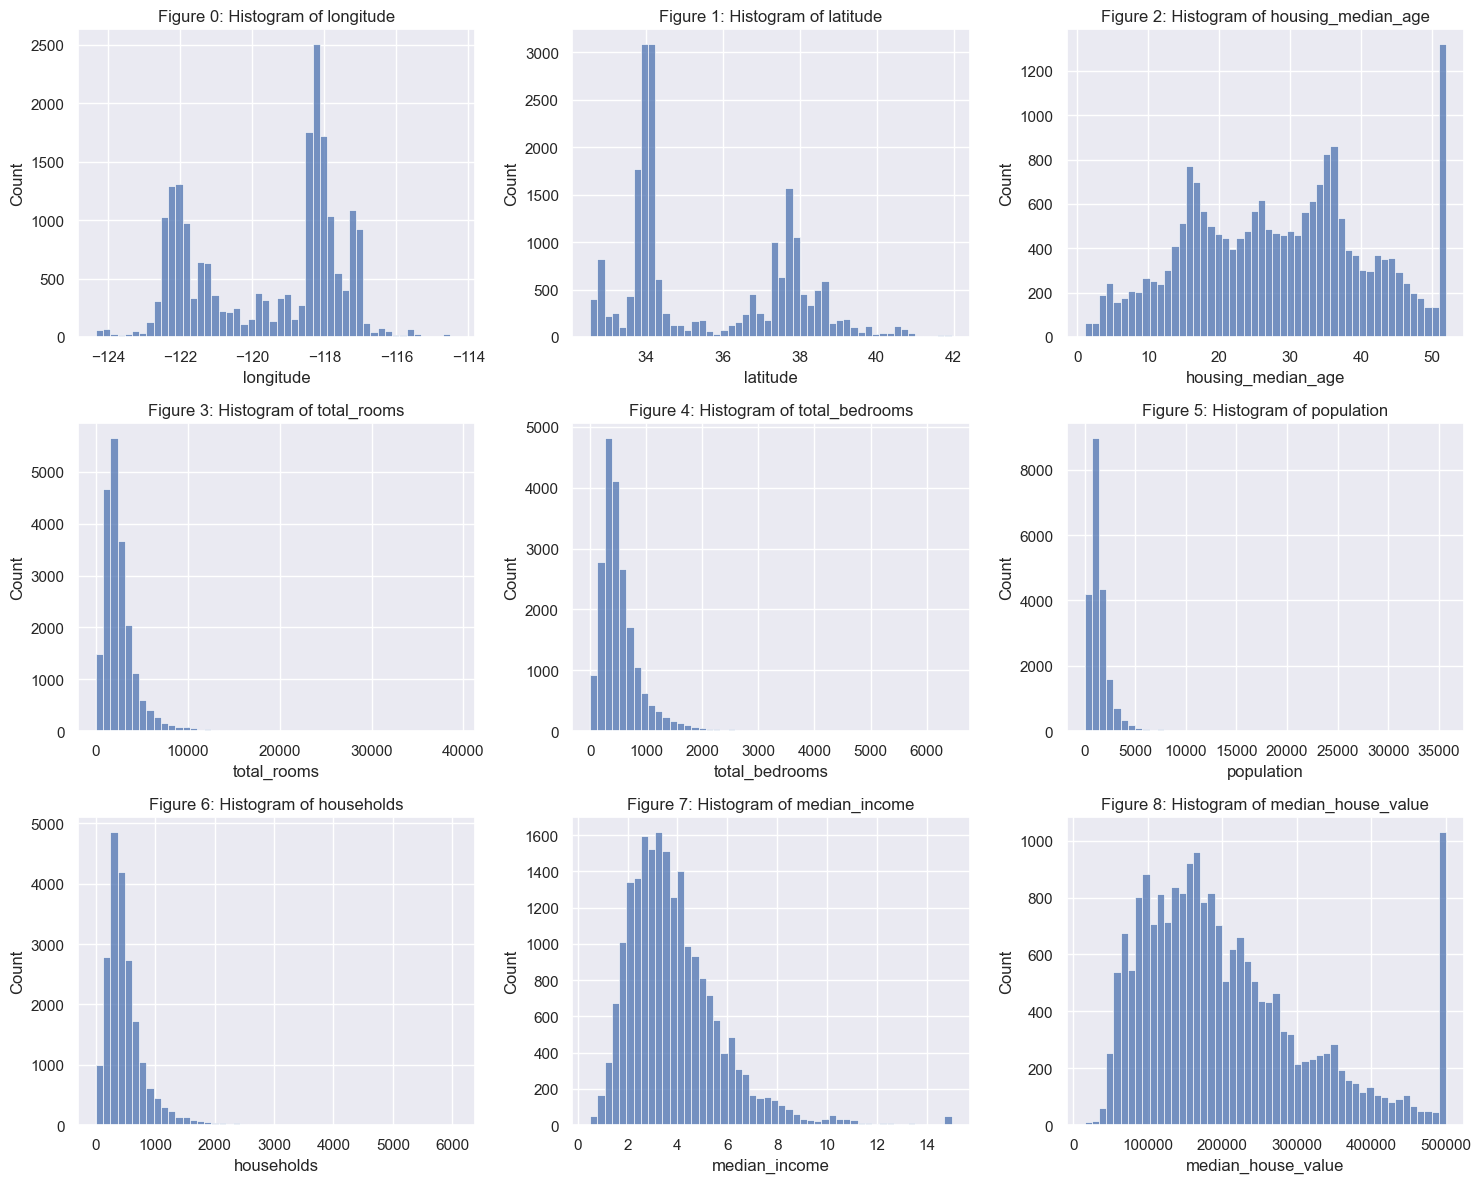

In [ ]:
# df_housing.hist(bins=50, figsize=(20, 15))
# plt.show()

numeric_cols = df_housing.select_dtypes(include=[np.number]).columns.to_list() # Lấy ra những feature nào thuộc numerical feature

n_rows = 3
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols * 5, n_rows * 4))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c # index to loop through list "numeric_cols"
        if i < len(numeric_cols):
            ax_i = ax[r, c]
            sns.histplot(data=df_housing[numeric_cols[i]], bins = 50, ax=ax_i);
            ax_i.set_title(f"Figure {i}: Histogram of {numeric_cols[i]}")
        else:
            pass

plt.tight_layout()
plt.show()

In [ ]:
# Đếm số lượng dòng có median_house_value đúng bằng 500000
num_capped = (df_housing["median_house_value"] == 500001.0).sum()
print(f"Số lượng dòng bị capped ở 500001.0: {num_capped}")

# Kiểm tra giá trị lớn nhất của median_house_value
max_value = df_housing["median_house_value"].max()
print(f"Giá trị lớn nhất của median_house_value: {max_value}")

# Đếm số lượng dòng có housing_median_age đúng bằng 500000
num_capped = (df_housing["housing_median_age"] == 52).sum()
print(f"Số lượng dòng bị capped ở 52: {num_capped}")

# Kiểm tra giá trị lớn nhất của housing_median_age
max_value = df_housing["housing_median_age"].max()
print(f"Giá trị lớn nhất của housing_median_age: {max_value}")

Số lượng dòng bị capped ở 500001.0: 965
Giá trị lớn nhất của median_house_value: 500001.0
Số lượng dòng bị capped ở 52: 1273
Giá trị lớn nhất của housing_median_age: 52.0


1. Đầu tiên, feature `median_income` có giá trị cao nhất là mức 15 (thực tế là 150001) đối với thu nhập cao hơn mức thu nhập trung bình  và ở mức 0,5 (thực tế là 0,4999) đối với thu nhập thấp hơn mức thu nhập trung bình. Các con số này biểu thị khoảng hàng chục nghìn đô la (ví dụ: `3` thực sự có nghĩa là khoảng `$30.000`).

2. Hai thuộc tính `housing_median_age` và `median_house_value` đã bị capped (giới hạn trên). Đặc biệt, `median_house_value` bị giới hạn tối đa ở mức `$500,000`. Điều này có thể gây ra vấn đề nghiêm trọng vì: <br>
- Đây là biến mục tiêu (label) mà bạn cần dự đoán.
- Nếu mô hình học máy chỉ nhìn thấy giá trị tối đa là $500,000, nó sẽ không học được về các trường hợp giá nhà thực tế cao hơn mức này.
- Khi gặp dữ liệu mới có giá trị thực tế vượt $500,000, mô hình sẽ không thể dự đoán chính xác (thường chỉ dự đoán tối đa là `$500000`).

**Tại sao đây là vấn đề?** <br>
- Mô hình sẽ bị lệch (bias) và không phản ánh đúng thực tế thị trường nếu có nhiều nhà giá cao hơn mức cap.
- Nếu khách hàng (người sử dụng mô hình) cần dự đoán chính xác cho các trường hợp giá cao, mô hình sẽ không đáp ứng được.

**Giải pháp:** <br>
**Thu thập lại nhãn đúng (Collect proper labels):**
- Tìm và cập nhật lại giá trị thực tế cho các quận bị giới hạn ở `$500000`.
- Điều này giúp mô hình học được toàn bộ phân phối giá trị, kể cả các giá trị lớn hơn `$500000`.

**Loại bỏ các dòng bị capped (Remove capped districts):**
- Xóa các dòng có median_house_value == `$500000` khỏi tập huấn luyện và tập kiểm tra.
- Như vậy, mô hình chỉ học và dự đoán trong phạm vi giá trị mà nó thực sự biết, tránh bị đánh giá sai khi gặp các trường hợp vượt quá giới hạn.

### 2.1. Create a Test Set
- Giả sử bạn trò chuyện với các chuyên gia, họ nói với bạn rằng `median_income` là một thuộc tính rất quan trọng để dự đoán giá `median housing`.
- Bạn có thể muốn đảm bảo rằng tập kiểm tra đại diện cho các loại thu nhập khác nhau trong toàn bộ tập dữ liệu. Vì `median income` là một thuộc tính số liên tục, trước tiên bạn cần tạo một thuộc tính loại thu nhập (`income category attribute`).

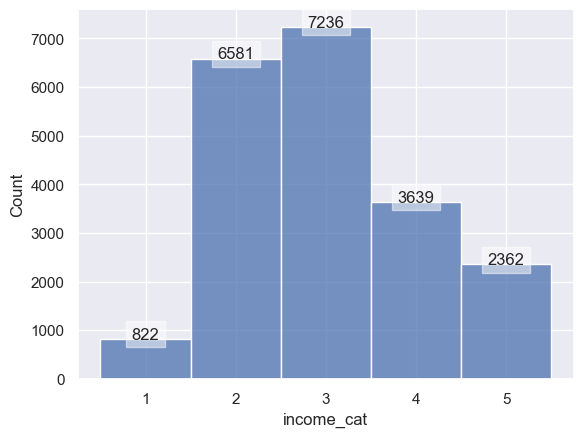

In [ ]:
# pd.cut(...): Hàm này chia một cột số liên tục thành các khoảng (bins) rời rạc.
# housing["median_income"]: Cột thu nhập trung vị của từng khu vực.
# bins=[0., 1.5, 3.0, 4.5, 6., np.inf]:
# Chia giá trị thành 5 khoảng:
# (0, 1.5] → nhóm 1
# (1.5, 3.0] → nhóm 2
# (3.0, 4.5] → nhóm 3
# (4.5, 6.0] → nhóm 4
# (6.0, ∞) → nhóm 5
# labels=[1, 2, 3, 4, 5]: Gán nhãn cho từng nhóm tương ứng.
df_housing["income_cat"] = pd.cut(df_housing["median_income"],
                                  bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                  labels=[1, 2, 3, 4, 5])

sns.histplot(data=df_housing["income_cat"]);
for index, value in enumerate(df_housing["income_cat"].value_counts().sort_index().to_list()):
    plt.text(index + 1, value, str(value), ha='center', bbox = dict(facecolor = "white", alpha = 0.5))

- Bây giờ bạn đã sẵn sàng thực hiện lấy mẫu phân tầng dựa trên `income_cat`. Đối với việc này, bạn có thể sử dụng lớp `StratifiedShuffleSplit` của Scikit-Learn.

Giải thích chi tiết về StratifiedShuffleSplit
StratifiedShuffleSplit là một công cụ trong thư viện Scikit-Learn dùng **để chia tập dữ liệu thành các tập con (train/test) theo cách phân tầng (stratified)**, đồng thời **xáo trộn (shuffle)** các mẫu trước khi chia.

**1. Stratified là gì?** <br>
Stratified nghĩa là việc chia dữ liệu sẽ đảm bảo tỷ lệ (phân phối) của một thuộc tính nào đó (thường là nhãn hoặc một đặc trưng quan trọng) giống nhau ở cả tập train và test. <br>
Ví dụ: Nếu bạn có 5 nhóm thu nhập (income_cat), thì tỷ lệ các nhóm này trong tập train và test sẽ gần giống với tỷ lệ của toàn bộ dữ liệu. <br>

**2. Tại sao cần Stratified?** <br>
Nếu chia ngẫu nhiên, có thể một số nhóm quan trọng bị thiếu hoặc quá ít trong tập test/train, dẫn đến mô hình học không đúng hoặc đánh giá sai. <br>
Đặc biệt quan trọng khi dữ liệu mất cân bằng (một số nhóm rất ít). <br>

**3. Cách hoạt động của StratifiedShuffleSplit** <br>
Bạn chỉ định số lần chia (n_splits), tỷ lệ test (test_size), và cột dùng để phân tầng (ví dụ: income_cat). <br>
Mỗi lần chia, dữ liệu được xáo trộn và sau đó chia theo tỷ lệ của từng nhóm trong cột phân tầng. <br>
Kết quả: **Tập train và test đều có phân phối nhóm giống nhau với toàn bộ dữ liệu.**

**4. Ví dụ** <br>
```python
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
```
Ở đây, dữ liệu được chia thành 80% train, 20% test, giữ nguyên tỷ lệ các nhóm income_cat ở cả hai tập.

**5. Lợi ích:** <br>
Đảm bảo tập train và test đại diện tốt cho toàn bộ dữ liệu.
Đánh giá mô hình chính xác hơn, tránh bias do chia ngẫu nhiên.

**Tóm lại:** <br>
StratifiedShuffleSplit giúp bạn chia dữ liệu thành train/test mà vẫn giữ nguyên tỷ lệ phân phối của một thuộc tính quan trọng, đảm bảo mô hình học và đánh giá khách quan, đặc biệt hữu ích khi dữ liệu có các nhóm không cân bằng.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_housing, df_housing["income_cat"]):
    strat_train_set = df_housing.loc[train_index]
    strat_test_set = df_housing.loc[test_index]


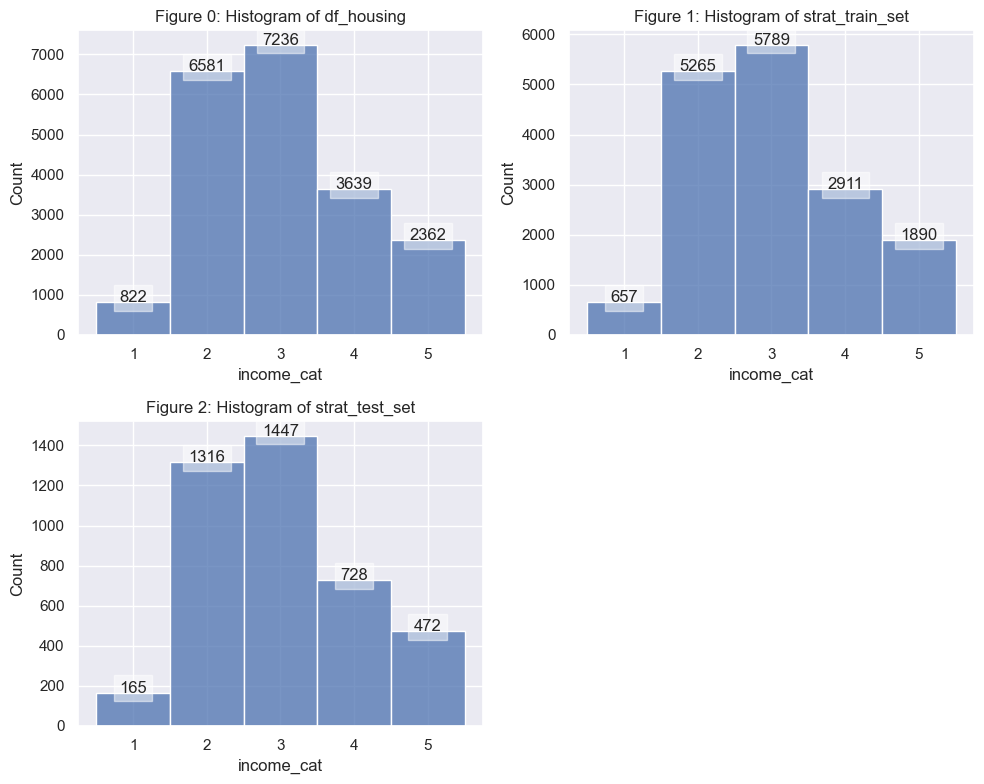

In [ ]:
def add_label_income_cat(df, ax_i):
    for index, value in enumerate(df["income_cat"].value_counts().sort_index().to_list()):
        ax_i.text(index + 1, value, str(value), ha='center', bbox = dict(facecolor = "white", alpha = 0.5))

list_label_income = ["df_housing", "strat_train_set", "strat_test_set"]
n_rows = 2
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols * 5, n_rows * 4))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c # index to loop through list "numeric_cols"
        if i < len(list_label_income):
            ax_i = ax[r, c]
            if r == 0 and c == 0:
                sns.histplot(data=df_housing["income_cat"], ax=ax_i);
                add_label_income_cat(df_housing, ax_i)
            else:
                if r == 0 and c == 1:
                    sns.histplot(data=strat_train_set["income_cat"], ax=ax_i);
                    add_label_income_cat(strat_train_set, ax_i)
                else:
                    sns.histplot(data=strat_test_set["income_cat"], ax=ax_i);
                    add_label_income_cat(strat_test_set, ax_i)
            ax_i.set_title(f"Figure {i}: Histogram of {list_label_income[i]}")
        else:
            pass
ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
# So sánh với lấy mẫu ngẫu nhiên
# Break off validation set from training data
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_housing, test_size=0.2, random_state=42)

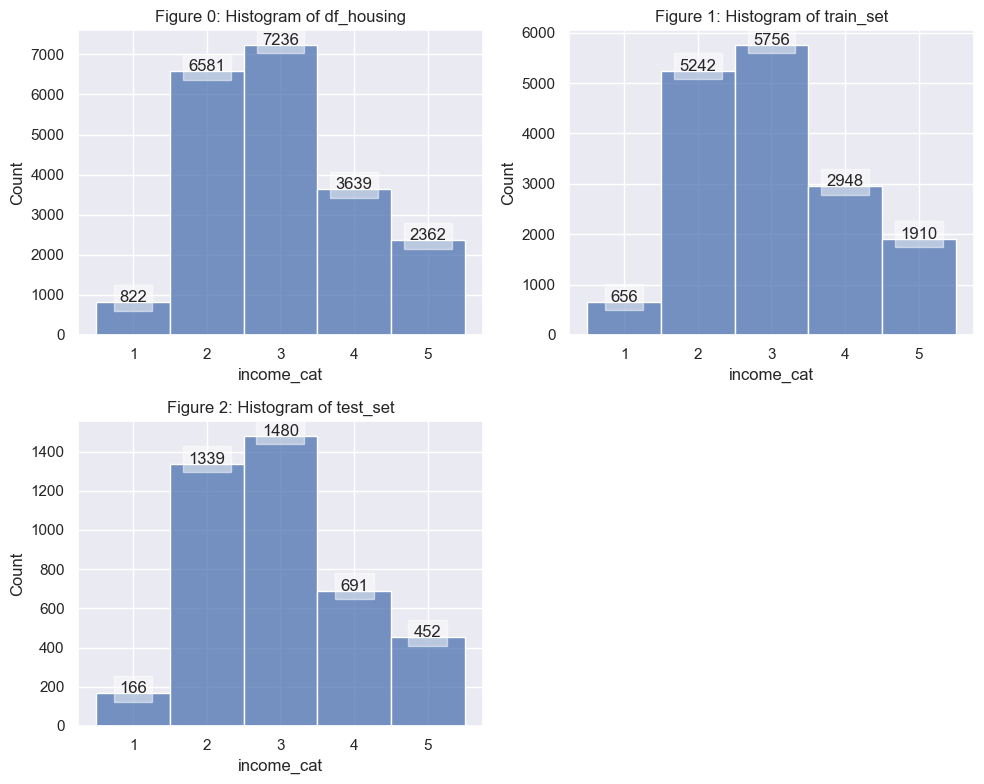

In [ ]:
list_label_income2 = ["df_housing", "train_set", "test_set"]
n_rows = 2
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols * 5, n_rows * 4))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c # index to loop through list "numeric_cols"
        if i < len(list_label_income2):
            ax_i = ax[r, c]
            if r == 0 and c == 0:
                sns.histplot(data=df_housing["income_cat"], ax=ax_i);
                add_label_income_cat(df_housing, ax_i)
            else:
                if r == 0 and c == 1:
                    sns.histplot(data=train_set["income_cat"], ax=ax_i);
                    add_label_income_cat(train_set, ax_i)
                else:
                    sns.histplot(data=test_set["income_cat"], ax=ax_i);
                    add_label_income_cat(test_set, ax_i)
            ax_i.set_title(f"Figure {i}: Histogram of {list_label_income2[i]}")
        else:
            pass
ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()

🔴 Như bạn có thể thấy, tập kiểm tra được tạo ra bằng cách sử dụng phương pháp lấy mẫu phân tầng (`stratified sampling`) có tỷ lệ nhóm thu nhập gần giống hệt với những tỷ lệ trong tập dữ liệu đầy đủ, **tuy nhiên  khi tập kiểm tra được tạo ra bằng cách sử dụng phương pháp lấy mẫu hoàn toàn ngẫu nhiên thì lại không lệch nhiều**.

Dù trong trường hợp này tỷ lệ các nhóm thu nhập giữa lấy mẫu phân tầng (stratified sampling) và lấy mẫu ngẫu nhiên (random sampling) không bị lệch quá nhiều, bạn vẫn nên ưu tiên dùng lấy mẫu phân tầng.

**Lý do:**

Lấy mẫu phân tầng đảm bảo chắc chắn rằng tỷ lệ các nhóm quan trọng (ví dụ: nhóm thu nhập thấp, cao) trong tập train và test giống với toàn bộ dữ liệu.
Nếu dữ liệu thực tế có sự mất cân bằng (một số nhóm rất ít), lấy mẫu ngẫu nhiên có thể vô tình làm thiếu hoặc thừa một nhóm nào đó trong tập test/train, dẫn đến mô hình học sai lệch hoặc đánh giá không khách quan. <br>
Lấy mẫu phân tầng là thói quen tốt và là chuẩn mực trong các dự án thực tế, giúp bạn tránh rủi ro khi dữ liệu thay đổi hoặc khi áp dụng cho các tập dữ liệu lớn hơn, phức tạp hơn. <br>

**Tóm lại:** <br>
Nên dùng lấy mẫu phân tầng để đảm bảo tính đại diện và khách quan cho tập train/test, dù trong trường hợp này sự khác biệt không lớn. Đây là phương pháp an toàn và chuyên nghiệp hơn.

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

Bây giờ bạn đã xóa thuộc tính `income_cat` để dữ liệu trở lại trạng thái ban đầu.

## 3. Explore the data to gain insights.
- Trước tiên, hãy đảm bảo rằng bạn đã đặt bộ kiểm tra sang một bên và bạn chỉ đang khám phá bộ đào tạo
- nếu bộ đào tạo rất lớn, bạn có thể muốn lấy mẫu một bộ khám phá để thao tác dễ dàng và nhanh chóng

### 3.1. Visualizing Geographical Data
- Hãy tạo một bản sao để bạn có thể chơi mà không làm hỏng bộ huấn luyện

In [ ]:
df_housing = strat_train_set.copy()

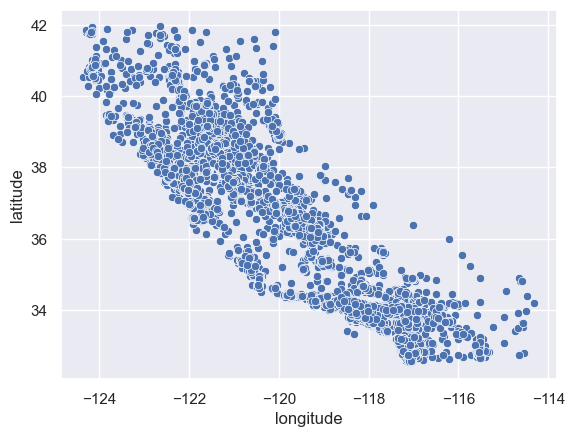

In [ ]:
sns.scatterplot(data=df_housing, x="longitude", y = "latitude");

- Trông giống California, nhưng ngoài ra thì khó có thể thấy bất kỳ mẫu cụ thể nào.
- Đặt tùy chọn `alpha` thành 0,4 giúp dễ hình dung hơn nhiều về những nơi có mật độ điểm dữ liệu cao

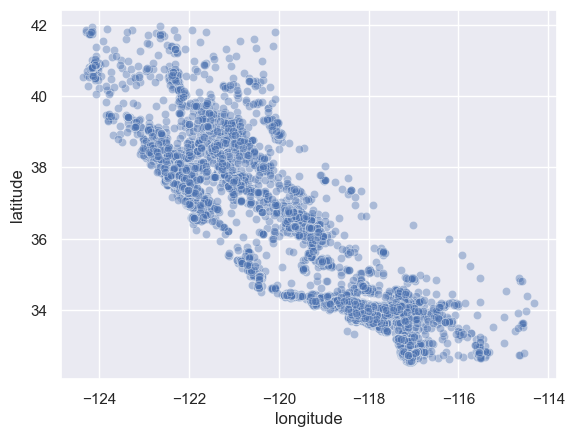

In [ ]:
sns.scatterplot(data=df_housing, x="longitude", y = "latitude", alpha = 0.4);

- Rõ ràng, các khu vực có mật độ dân số cao là Vùng Vịnh và xung quanh Los Angeles và San Diego, cộng với một đường dài có mật độ dân số khá cao ở Thung lũng Trung tâm, đặc biệt là xung quanh Sacramento và Fresno.

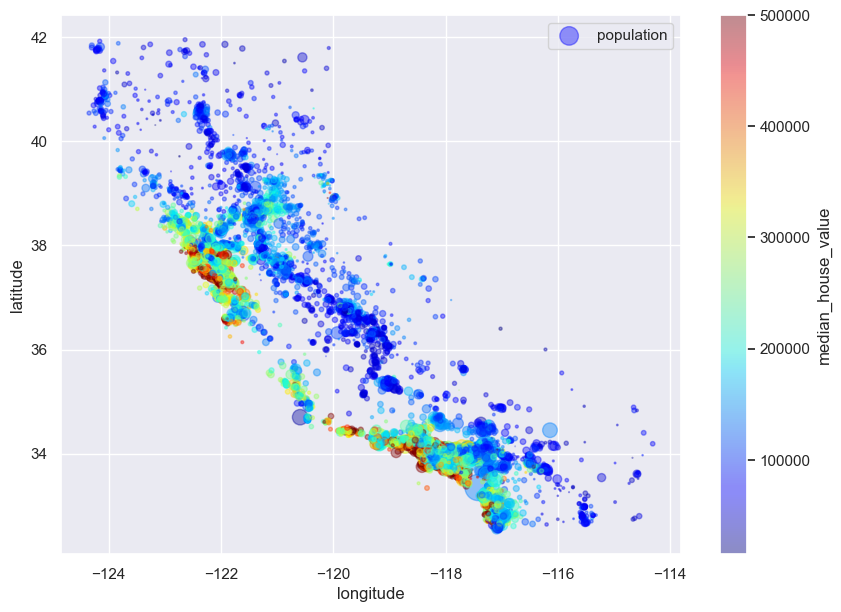

In [ ]:
df_housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    #To represent Population
    s=df_housing["population"]/100, label="population", figsize=(10,7),
    #To represent House Price
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
# df_housing["population"]/100 là để giảm scale lại.
plt.legend()
plt.show()

- Giá nhà có liên quan rất nhiều đến
- vị trí (ví dụ: gần đại dương) và mật độ dân số, ...

### 3.2. Looking for Correlations
- Vì tập dữ liệu không quá lớn, bạn có thể dễ dàng tính toán hệ số tương quan chuẩn (còn gọi là r của Pearson) giữa mọi cặp thuộc tính bằng phương pháp `corr()

In [ ]:
corr_matrix = df_housing.corr(numeric_only=True)
corr_matrix

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105823     0.048909   
latitude            -0.924478  1.000000            0.005737    -0.039245   
housing_median_age  -0.105823  0.005737            1.000000    -0.364535   
total_rooms          0.048909 -0.039245           -0.364535     1.000000   
total_bedrooms       0.076686 -0.072550           -0.325101     0.929391   
population           0.108071 -0.115290           -0.298737     0.855103   
households           0.063146 -0.077765           -0.306473     0.918396   
median_income       -0.019615 -0.075146           -0.111315     0.200133   
median_house_value  -0.047466 -0.142673            0.114146     0.135140   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076686    0.108071    0.063146      -0.019615   
latitude                 -0.072550   -0.115290   -0.077765      -0.075146   
housing_median_age       -0.325101   -0.298737   -0.306473      -0.111315   
total_rooms               0.929391    0.855103    0.918396       0.200133   
total_bedrooms            1.000000    0.876324    0.980167      -0.009643   
population                0.876324    1.000000    0.904639       0.002421   
households                0.980167    0.904639    1.000000       0.010869   
median_income            -0.009643    0.002421    0.010869       1.000000   
median_house_value        0.047781   -0.026882    0.064590       0.687151   

                    median_house_value  
longitude                    -0.047466  
latitude                     -0.142673  
housing_median_age            0.114146  
total_rooms                   0.135140  
total_bedrooms                0.047781  
population                   -0.026882  
households                    0.064590  
median_income                 0.687151  
median_house_value            1.000000

- Bây giờ hãy xem xét mức độ tương quan của từng thuộc tính với `median_house_value`:

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

Hệ số tương quan Pearson (r) có giá trị giao động trong khoảng liên tục từ -1 đến +1:

* **r = 0:** Hai biến không có tương quan tuyến tính
* **r = 1; r = -1:** Hai biến có mối tương quan tuyến tính tuyệt đối.
Ví dụ: Với r = 1, giá trị nhà trung bình có xu hướng tăng khi thu nhập trung bình tăng.

* **r < 0:** Hệ số tương quan âm. Nghĩa là giá trị biến x tăng thì giá trị biến y giảm và ngược lại, giá trị biến y tăng thì giá trị biến x giảm.
* **r > 0:** Hệ số tương quan dương. Nghĩa là giá trị biến x tăng thì giá trị biến y tăng và ngược lại, giá trị biến y tăng thì giá trị biến x cũng tăng.

**Lưu ý:** <br>
Hệ số tương quan pearson (r) chỉ có ý nghĩa khi và chỉ khi mức ý nghĩa quan sát (sig.) nhỏ hơn mức ý nghĩa α = 5%.
* Nếu r nằm trong khoảng từ 0,50 đến ± 1, thì nó được cho là tương quan mạnh.
* Nếu r nằm trong khoảng từ 0,30 đến ± 0,49, thì nó được gọi là tương quan trung bình.
* Nếu r nằm dưới ± .29, thì nó được gọi là một mối tương quan yếu.
Trên đồ thị phân tán Scatter, nếu r = -1 dữ liệu sẽ phân bổ trên một đường thẳng với độ dốc âm, r = 1 dữ liệu sẽ phân bổ trên một đường thẳng với độ dốc dương.

![](correlation.png)

In [ ]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


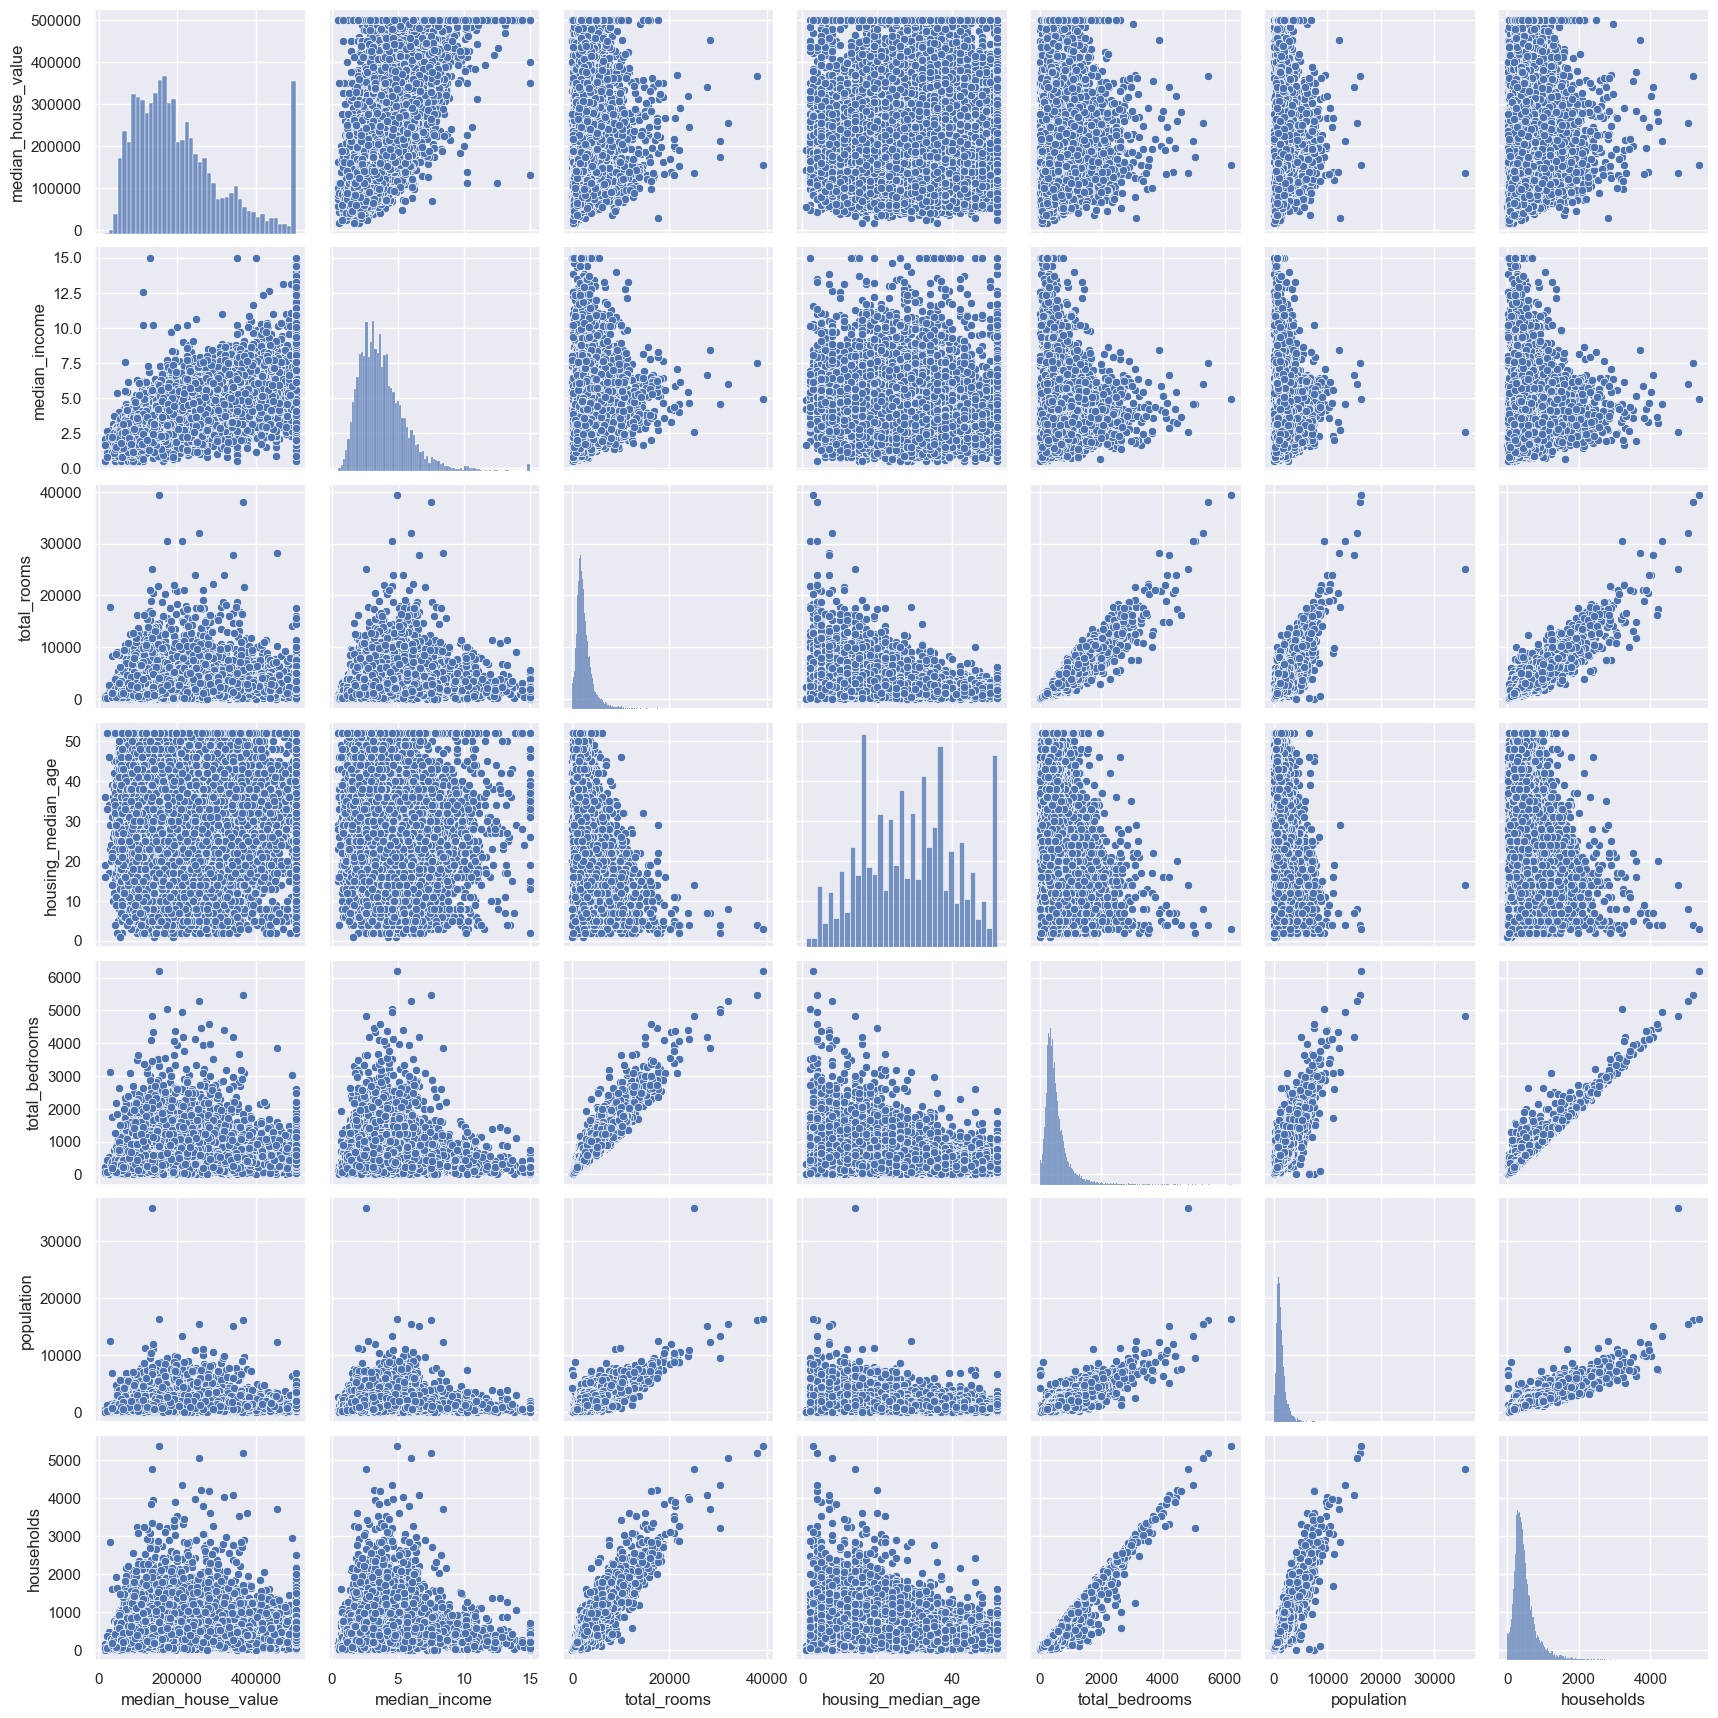

In [ ]:
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age", "total_bedrooms", "population", "households"]

sns.pairplot(df_housing[attributes]);

- Dựa vào figure trên thì có thể thấy `median_income` là feature hứa hẹn dùng để dự đoán `median_house_value`.
- Tương quan thực sự rất mạnh, có thể thấy rõ xu hướng tăng và các điểm không quá phân tán.

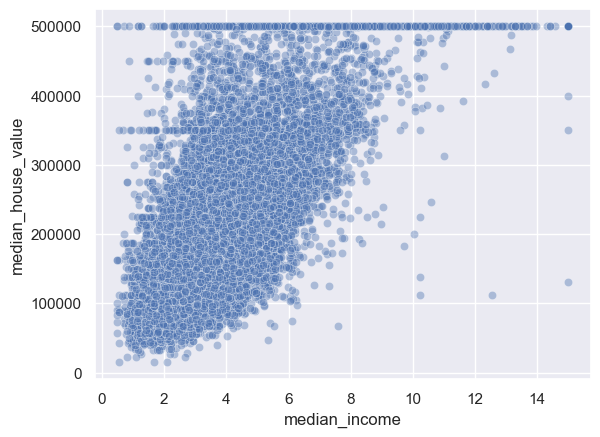

In [ ]:
sns.scatterplot(data=df_housing, x = "median_income", y = "median_house_value", alpha=0.4);

- Mức giá bị hạn chế `500000$` như đã đề cập trước đó biểu diễn dưới dạng đường hàng ngang trên cùng.
- Ngoài ra còn có 1 số đường ít rõ ràng hơn chẳng hạn như đường ngang `450000$`,  `280000$`, `350000$`.

### 3.3. Experimenting with Attribute Combinations
- Một điều cuối cùng có thể muốn làm trước khi thực sự chuẩn bị dữ liệu cho các thuật toán Học máy là thử nghiệm nhiều kết hợp thuộc tính khác nhau.
- Ví dụ, tổng số phòng trong một quận không hữu ích lắm nếu bạn không biết có bao nhiêu hộ gia đình.
- Điều bạn thực sự muốn là số phòng trên mỗi hộ gia đình.
- Tương tự như vậy,  dân số trên mỗi hộ gia đình cũng có vẻ là một kết hợp thuộc tính thú vị để xem xét. Hãy tạo các thuộc tính mới này:

In [ ]:
df_housing["rooms_per_household"] = df_housing["total_rooms"] / df_housing["households"]
df_housing["bedrooms_per_room"] = df_housing["total_bedrooms"] / df_housing["total_rooms"]
df_housing["population_per_household"]=df_housing["population"] / df_housing["households"]

In [ ]:
corr_matrix = df_housing.corr(numeric_only=True)

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

- Thuộc tính `bedrooms_per_room` mới có mối tương quan nhiều với `median_house_value` so với `population_per_household` hoặc `rooms_per_household` mặc dù là tương quan âm.
- Rõ ràng là những ngôi nhà có tỷ lệ phòng ngủ/phòng thấp hơn có xu hướng đắt hơn.
- Số phòng trên mỗi hộ gia đình (`rooms_per_household`) cũng cung cấp nhiều thông tin hơn so với tổng số phòng trong một quận—rõ ràng là nhà càng lớn thì càng đắt mặc dù là tương quan dương yếu nhưng cũng đủ kết luật là nhà càng to (số phòng càng nhiều) thì giá càng cao.

# 4. Prepare the Data for Machine Learning Algorithms

- Quay lại tập huấn luyện (bằng cách sao chép `strat_train_set` một lần nữa).

In [ ]:
df_housing = strat_train_set.drop("median_house_value", axis=1)
df_housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
df_housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income ocean_proximity  
12655      2237.0       706.0         2.1736          INLAND  
15502      2015.0       768.0         6.3373      NEAR OCEAN  
2908        667.0       300.0         2.8750          INLAND  
14053       898.0       483.0         2.2264      NEAR OCEAN  
20496      1837.0       580.0         4.4964       <1H OCEAN

In [ ]:
for idx, col in enumerate(df_housing.columns):
    print(f"{idx}: {col}")

0: longitude
1: latitude
2: housing_median_age
3: total_rooms
4: total_bedrooms
5: population
6: households
7: median_income
8: ocean_proximity


## 4.1. Dọn dẹp dữ liệu

### 4.1.1. Handling Missing Values

- Hầu hết các thuật toán Học máy không thể hoạt động với các tính năng bị thiếu, vì vậy hãy tạo một vài hàm để xử lý chúng.
- Bạn đã nhận thấy trước đó rằng thuộc tính `total_bedrooms` có một số giá trị bị thiếu, vì vậy hãy sửa lỗi này. Bạn có ba tùy chọn:
    - Xóa các record tương ứng.
    - Xóa toàn bộ thuộc tính.
    - Đặt các giá trị thành một số giá trị (không, giá trị trung bình, giá trị trung vị, v.v.).

- Scikit-Learn cung cấp một lớp tiện dụng để xử lý các giá trị bị thiếu: `SimpleImputer`.

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
# Vì trung vị chỉ có thể được tính toán trên các thuộc tính số,
# chúng ta cần tạo một bản sao của dữ liệu mà không có thuộc tính văn bản ocean_proximity

df_housing_num = df_housing.drop("ocean_proximity", axis=1)
imputer.fit(df_housing_num)

SimpleImputer(strategy='median')

- `imputer` chỉ tính toán **trung vị của mỗi thuộc tính** và lưu trữ kết quả trong biến thể hiện `statistics_` của nó.
- Chỉ có thuộc tính `total_bedrooms` bị thiếu giá trị, nhưng không thể chắc chắn rằng sẽ không có giá trị nào bị thiếu trong dữ liệu mới sau khi hệ thống hoạt động, vì vậy, an toàn hơn khi áp dụng imputer cho tất cả các thuộc tính số.

In [ ]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
# Kiểm tra các giá trị median bằng median() xem có giống "statistics_"
df_housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

### 4.1.2. Handling Text and Categorical Attributes

- Trước đó chúng ta đã bỏ qua thuộc tính phân loại `ocean_proximity` vì nó là thuộc tính phân loại nên chúng ta không thể tính toán trung vị của nó.

In [ ]:
# `df_housing[["ocean_proximity"]]` nghĩa là **lấy ra một DataFrame chỉ chứa cột "ocean_proximity"** từ DataFrame gốc `df_housing`.
# - Nếu bạn dùng **một cặp ngoặc vuông**:
#   `df_housing["ocean_proximity"]`
#   → Kết quả là một **Series** (một chiều).
# - Nếu bạn dùng **hai cặp ngoặc vuông**:
#   `df_housing[["ocean_proximity"]]`
#   → Kết quả là một **DataFrame** (hai chiều), vẫn giữ dạng bảng.
# **Tóm lại:**
# - Hai cặp ngoặc vuông dùng để lấy ra một DataFrame (dạng bảng), thuận tiện khi bạn muốn xử lý dữ liệu nhiều cột
# hoặc dùng cho các hàm yêu cầu đầu vào là DataFrame.
df_housing_cat = df_housing[["ocean_proximity"]]
df_housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7277
INLAND             5262
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
Name: count, dtype: int64

In [ ]:
df_housing_cat

ocean_proximity
12655          INLAND
15502      NEAR OCEAN
2908           INLAND
14053      NEAR OCEAN
20496       <1H OCEAN
...               ...
15174       <1H OCEAN
12661          INLAND
19263       <1H OCEAN
19140       <1H OCEAN
19773          INLAND

[16512 rows x 1 columns]

- Hầu hết các thuật toán Học máy đều thích làm việc với số, vì vậy hãy chuyển đổi các danh mục này từ `categorical` sang `numerical`.
- Đối với điều này, chúng ta có thể sử dụng class `OneHotEncoder` của Scikit-Learn.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
df_housing_cat_1hot = encoder.fit_transform(df_housing_cat)
df_housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

- Output là `SciPy sparse matrix`, thay vì mảng NumPy.
- Điều này là do One-Hot Encoding sẽ trả về sparse matrix, là ma trận mà hầu hết các phần tử đều bằng 0. Xử lý một ma trận sparse như một ma trận dày đặc thường không hiệu quả, sử dụng quá nhiều bộ nhớ.
- Vì vậy, khi làm việc với các ma trận sparse, nên sử dụng các cấu trúc dữ liệu chuyên dụng `SciPy sparse matrix` để chỉ lưu trữ các giá trị khác không và vị trí của chúng là một kỹ thuật phổ biến trong việc lưu trữ các tập dữ liệu sparse. để lưu trữ và xử lý hiệu quả.
- Để chuyển đổi nó thành một mảng NumPy (dày đặc), chỉ cần gọi phương thức `toarray()`:

In [ ]:
df_housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 4.1.3. Custom Transformers
- Mặc dù Scikit-Learn cung cấp nhiều bộ chuyển đổi hữu ích, bạn sẽ cần phải tự viết bộ chuyển đổi cho các tác vụ như hoạt động dọn dẹp tùy chỉnh hoặc kết hợp các thuộc tính cụ thể
- Vì Scikit-Learn dựa vào **duck typing** (không phải kế thừa), tất cả những gì bạn cần là tạo một lớp và triển khai ba phương thức: `fit()` (trả về self nếu không có gì), `transform()` và `fit_transform()` (chỉ cần thêm `TransformerMixin` làm lớp cơ sở).

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

total_rooms_idx, total_bedrooms_idx, population_idx, households_idx = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y = None):
        return self # nothing else to do
    def transform(self, X, y = None):
        rooms_per_household = X[:, total_rooms_idx] / X[:, households_idx]
        population_per_household = X[:, population_idx] / X[:, households_idx]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, total_bedrooms_idx] / X[:, total_rooms_idx]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(df_housing.values)

- `np.c_`: là một công cụ của NumPy dùng để nối (stack) các mảng theo chiều cột (column-wise), tức là ghép các mảng lại với nhau thành các cột mới.
Ví dụ:
```python
import numpy as np
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
# Dùng np.c_ để ghép a và b thành 2 cột của một ma trận mới
result = np.c_[a, b]
print(result)
```
- bộ chuyển đổi có một siêu tham số, `add_bedrooms_per_room`, được đặt thành True theo mặc định (thường hữu ích khi cung cấp các giá trị mặc định hợp lý).
- Siêu tham số này sẽ cho phép bạn dễ dàng tìm ra liệu việc thêm thuộc tính này có giúp ích cho các thuật toán Học máy hay không.
- Bạn càng tự động hóa các bước chuẩn bị dữ liệu này, bạn càng có thể tự động thử nhiều kết hợp hơn, giúp bạn có nhiều khả năng tìm thấy một kết hợp tuyệt vời (và tiết kiệm rất nhiều thời gian).

## 4.2. Feature Scaling
Hai cách phổ biến để có được tất cả các thuộc tính có cùng một tỷ lệ: <br>
- `Min-max scaling (normalization)`: các giá trị được dịch chuyển và thay đổi tỷ lệ để chúng kết thúc trong phạm vi từ 0 đến 1.
    Syntax:
    X_scaled = (X - X_min) / (X_max - X_min) <br>
    `X`: giá trị gốc <br>
    `X_min`: giá trị nhỏ nhất của thuộc tính <br>
    `X_max`: giá trị lớn nhất của thuộc tính <br>

    **Ý nghĩa:** <br>
    Sau khi min-max scaling, tất cả các giá trị sẽ nằm trong khoảng từ 0 đến 1. <br>
    Giúp các thuật toán học máy hoạt động hiệu quả hơn, đặc biệt là các thuật toán nhạy cảm với thang đo (như KNN, mạng nơ-ron) <br>

    **Ví dụ:**
    ```python
    from sklearn.preprocessing import MinMaxScaler

    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    ```
    **Lưu ý:** <br>
    Min-max scaling rất nhạy cảm với giá trị ngoại lai (outlier).

- `Standardization (chuẩn hóa z-score)`: Không giống như tỷ lệ min-max scaling, chuẩn hóa **không ràng buộc các giá trị vào một phạm vi cụ thể**, điều này có thể là vấn đề đối với một số thuật toán (ví dụ: mạng nơ-ron thường mong đợi một giá trị đầu vào trong phạm vi từ 0 đến 1). Tuy nhiên, **chuẩn hóa ít bị ảnh hưởng bởi các giá trị ngoại lai hơn nhiều.**

    Là kỹ thuật chuyển đổi dữ liệu sao cho mỗi đặc trưng (feature) có trung bình (mean) = 0 và độ lệch chuẩn (std) = 1.
    Syntax:
    X_scaled = (X - mean) / std <br>
    `mean`: giá trị trung bình của thuộc tính <br>
    `std`: độ lệch chuẩn của thuộc tính <br>

    **Ý nghĩa:** <br>
    Sau khi chuẩn hóa, dữ liệu có phân phối chuẩn với mean = 0, std = 1. <br>
    Ít bị ảnh hưởng bởi outlier hơn so với min-max scaling. <br>
    Thường dùng cho các thuật toán như Linear Regression, SVM, KNN, PCA... <br>

    **Ví dụ:**
    ```python
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    ```
    **Lưu ý:** <br>
    Standardization không giới hạn giá trị trong một khoảng cố định như [0, 1] (dữ liệu sau khi chuẩn hóa sẽ có trung bình = 0 và độ lệch chuẩn = 1, nhưng giá trị của các phần tử có thể nhỏ hơn 0 hoặc lớn hơn 1).

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy = "median")),
    ("attr_adder", CombinedAttributesAdder()),
    ("scaler", StandardScaler())
])

In [ ]:
df_housing_num.columns.to_list()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

- Cho đến nay, chúng tôi đã xử lý các `categorical columns` và `numerical columns` riêng biệt.
- Sẽ thuận tiện hơn nếu có một bộ chuyển đổi duy nhất có thể xử lý tất cả các cột, áp dụng các phép biến đổi phù hợp cho từng cột.
- Trong phiên bản 0.20, Scikit-Learn đã giới thiệu `ColumnTransformer` cho mục đích này và tin tốt là nó hoạt động rất tốt với Pandas DataFrames. Hãy sử dụng nó để áp dụng tất cả các phép biến đổi cho dữ liệu `housing`

In [ ]:
from sklearn.compose import ColumnTransformer

num_feature = df_housing_num.columns.to_list()
cat_feature = ["ocean_proximity"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_feature),
        ("cat", OneHotEncoder(), cat_feature),
    ]
)

df_housing_prepared = preprocessor.fit_transform(df_housing)
df_housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

- Lưu ý rằng `OneHotEncoder` trả về ma trận **sparse**, trong khi `num_pipeline` trả về ma trận **dense**.
- Khi có sự kết hợp giữa ma trận **sparse** và **dense** như vậy, `ColumnTransformer` ước tính mật độ của ma trận cuối cùng (tức là tỷ lệ các ô khác không) và trả về ma trận **sparse** nếu mật độ thấp hơn ngưỡng nhất định (theo mặc định, `sparse_threshold=0.3`). <br>
    **Cụ thể:**
    - Khi bạn sử dụng `ColumnTransformer` để kết hợp nhiều pipeline (ví dụ: một pipeline xử lý số trả về ma trận dense, một pipeline xử lý categorical trả về ma trận sparse), Scikit-Learn sẽ tự động quyết định kiểu dữ liệu đầu ra (dense hay sparse) dựa trên mức độ "thưa" **(density)** của ma trận kết quả. <br>
    - `Density` là tỷ lệ số lượng phần tử khác 0 trên tổng số phần tử trong ma trận.
    - Nếu tỷ lệ này thấp hơn giá trị `sparse_threshold` (mặc định là 0.3, tức 30%), ColumnTransformer sẽ trả về một `sparse matrix` (ma trận thưa, tiết kiệm bộ nhớ).
    - Nếu tỷ lệ này cao hơn hoặc bằng `sparse_threshold`, nó sẽ trả về một `dense matrix` (ma trận dày đặc, kiểu numpy array). <br>

    **Ý nghĩa:** <br>
    - Nếu dữ liệu của bạn chủ yếu là số 0 (ví dụ, sau one-hot encoding nhiều cột), việc dùng `sparse matrix` sẽ tiết kiệm bộ nhớ và tăng tốc xử lý.
    - Nếu dữ liệu chủ yếu là số khác 0, dùng `dense matrix` sẽ thuận tiện hơn. Có thể điều chỉnh ngưỡng `sparse_threshold`
    ```python
    ColumnTransformer(
    ...,
    sparse_threshold=0.5  # ví dụ, tăng ngưỡng lên 50%
    )
    ```
- Trong ví dụ này, nó trả về ma trận **dense**.

# 5. Select and Train a Model
## 5.1. Training and Evaluating on the Training Set

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_housing_prepared, df_housing_labels)

LinearRegression()

In [ ]:
some_data = df_housing.iloc[:5]
some_labels = df_housing_labels.iloc[:5]
some_data_prepared = preprocessor.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", some_labels.to_list())

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(df_housing_prepared) # dùng trực tiếp df_housing_prepared để dữ đoán luôn.
lin_mse = mean_squared_error(df_housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(68627.87390018745)

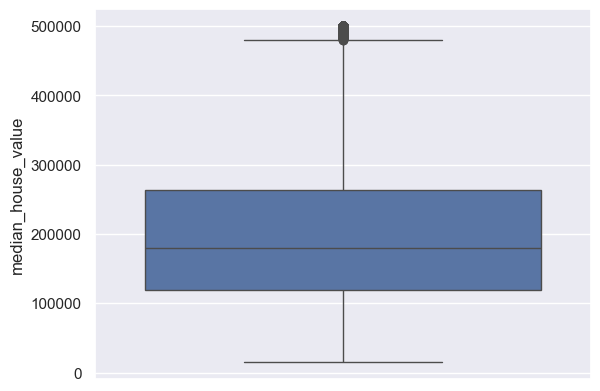

In [ ]:
sns.boxplot(data=df_housing_labels);

- Đây không phải là điểm đánh giá tốt: `median_housing_values` của hầu hết các quận nằm trong khoảng từ `$120.000` đến `$265.000`, do đó, giá trị RMSE trả về `$68.628` cho thấy mức sai số trung bình khá lớn so với giá trị thưc tế. <br>
    Ví dụ: Nếu một căn nhà thực tế giá $200.000, mô hình có thể dự đoán lệch lên tới $68.628 (tức là sai số khoảng 30% giá trị thực). <br>
    $200.000 + $68.628 = $268.628 <br>
    $200.000 - $68.628 = $131.372
- Đây là ví dụ về mô hình **underfitting** với dữ liệu đào tạo.
- Khi điều này xảy ra, điều đó có nghĩa là các tính năng không cung cấp đủ thông tin để đưa ra dự đoán tốt hoặc mô hình không đủ mạnh.

- **Giải pháp**: các cách chính để khắc phục **underfitting**:
    - Chọn một mô hình mạnh hơn,
    - Cung cấp các tính năng tốt hơn cho thuật toán đào tạo hoặc
    - Giảm các ràng buộc đối với mô hình.

- Hãy đào tạo một `DecisionTreeRegressor` (Chương 6). Đây là một mô hình mạnh mẽ, có khả năng tìm ra các mối quan hệ **nonlinear** phức tạp trong dữ liệu

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(df_housing_prepared, df_housing_labels)

DecisionTreeRegressor()

In [ ]:
housing_predictions_tree = tree_reg.predict(df_housing_prepared) # dùng trực tiếp df_housing_prepared để dữ đoán luôn.
tree_mse = mean_squared_error(df_housing_labels, housing_predictions_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

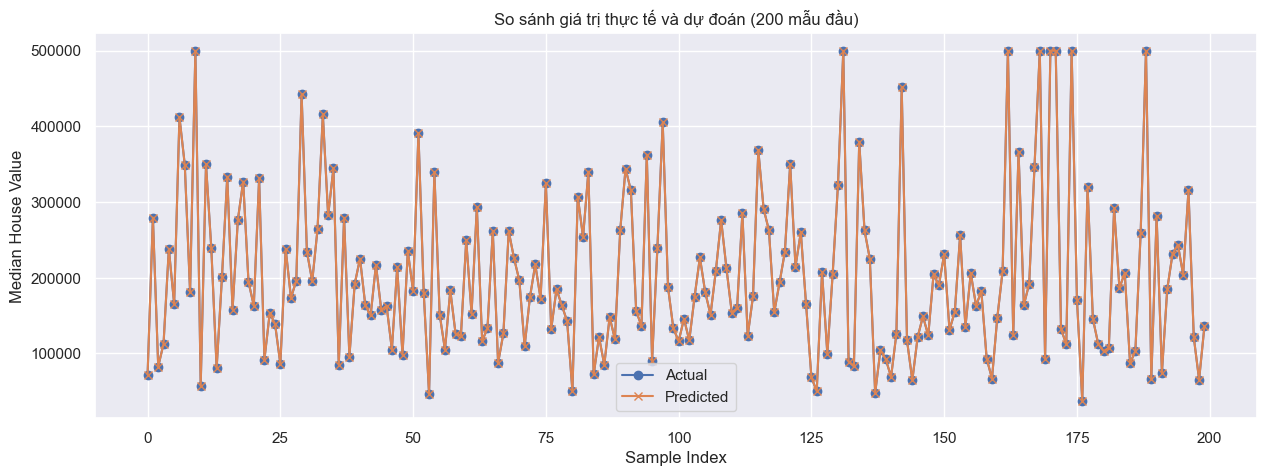

In [ ]:
# Kiểm tra **overfit** giữa df_housing_labels và housing_predictions_tree
plt.figure(figsize=(15,5))
plt.plot(df_housing_labels.values[:200], label='Actual', marker='o')
plt.plot(housing_predictions_tree[:200], label='Predicted', marker='x')
plt.title('So sánh giá trị thực tế và dự đoán (200 mẫu đầu)')
plt.xlabel('Sample Index')
plt.ylabel('Median House Value')
plt.legend()
plt.show()

- Không có lỗi nào cả? Có nhiều khả năng là mô hình đã **overfit** dữ liệu.
- Làm sao có thể chắc chắn? Như chúng ta đã thấy trước đó, bạn không muốn chạm vào bộ kiểm tra cho đến khi bạn sẵn sàng khởi chạy một mô hình mà bạn tự tin, vì vậy bạn cần sử dụng một phần của bộ đào tạo để đào tạo và một phần để xác thực mô hình.

## 5.2. Evaluation Using Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(tree_reg, df_housing_prepared, df_housing_labels,
                         scoring="neg_mean_squared_error", cv = 10)
tree_rmse_scroes = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print(f"Scores: {scores}")
    print(f"Mean scores: {scores.mean()}")
    print(f"Standard deviation: {scores.std()}")

display_scores(tree_rmse_scroes)

Scores: [70826.34187697 69796.89921643 67897.39648966 71734.92414621
 71825.21736962 78367.20235933 70692.4899202  73925.47619357
 68499.439445   72453.47767816]
Mean scores: 71601.88646951276
Standard deviation: 2828.3604018791534


- `Cross-Validation` cho phép không chỉ có được ước tính về `performance` của mô hình mà còn có được thước đo về độ chính xác của ước tính này (tức là **standard deviation**). Chúng ta sẽ không có thông tin này nếu bạn chỉ sử dụng duy nhất một tập validation.
- Decision Tree có điểm số xấp xỉ 71.407, độ lệch chuẩn là ±2.439.

- Hãy tính cùng điểm số cho mô hình hồi quy tuyến tính

In [ ]:
lin_scores = cross_val_score(lin_reg, df_housing_prepared, df_housing_labels,
                         scoring="neg_mean_squared_error", cv = 10)

lin_rmse_scroes = np.sqrt(-lin_scores)
display_scores(lin_rmse_scroes)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean scores: 69104.07998247063
Standard deviation: 2880.3282098180666


- Mô hình hồi quy tuyến tính hoạt động tốt hơn Decision Tree.
- Điều đó có lý vì mô hình Decision Tree đang `overfitting` với dữ liệu đào tạo.

Bây giờ chúng ta hãy thử một mô hình cuối cùng: `RandomForestRegressor` (Chương 7)
- Random Forests hoạt động bằng cách đào tạo nhiều Decision Tree trên các tập hợp con ngẫu nhiên của các tính năng, sau đó tính trung bình các dự đoán của chúng.
- Xây dựng một mô hình trên nhiều mô hình khác được gọi là `Ensemble Learning`

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=2025)

forest_reg.fit(df_housing_prepared, df_housing_labels)
forest_score = cross_val_score(forest_reg, df_housing_prepared, df_housing_labels,
                         scoring="neg_mean_squared_error", cv = 10)

forest_rmse_scroes = np.sqrt(-forest_score)
display_scores(forest_rmse_scroes)

Scores: [51525.4807817  49032.4037928  46821.87140372 52000.12428726
 47857.41732012 51655.61036056 52301.75020876 49976.75659096
 48318.35487755 53914.5035445 ]
Mean scores: 50340.42731679285
Standard deviation: 2167.6483524269347


- Điều này tốt hơn nhiều: Random Forests có vẻ rất hứa hẹn.
- Chúng ta nên thử nhiều mô hình khác từ nhiều loại thuật toán Học máy khác nhau ( Support Vector Machines with different kernels, possibly a neural network, etc..), mà không cần dành quá nhiều thời gian để điều chỉnh các siêu tham số.
- Mục tiêu là chọn ra một số mô hình (từ hai đến năm) có triển vọng.

In [ ]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

# Danh các mô hình hồi quy
seed = 42
max_iter = 10000
models = [
    LinearRegression(),
    Lasso(alpha=1.0, max_iter=max_iter, random_state=seed),
    Ridge(alpha=0.1, max_iter=max_iter, random_state=seed),
    ElasticNet(alpha=0.1, max_iter=max_iter, random_state=seed),
    DecisionTreeRegressor(max_depth=5, random_state=seed),
    RandomForestRegressor(n_estimators=100, random_state=seed),
    GradientBoostingRegressor(random_state=seed),
    AdaBoostRegressor(random_state=seed),
    ExtraTreesRegressor(random_state=seed),
    SVR(kernel="rbf", max_iter=max_iter),
    LinearSVR(max_iter=max_iter, random_state=seed),
    # MLPRegressor(max_iter=max_iter, random_state=seed),
    KNeighborsRegressor(n_neighbors=5),
    XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=seed),
    GaussianProcessRegressor(random_state=seed)
]

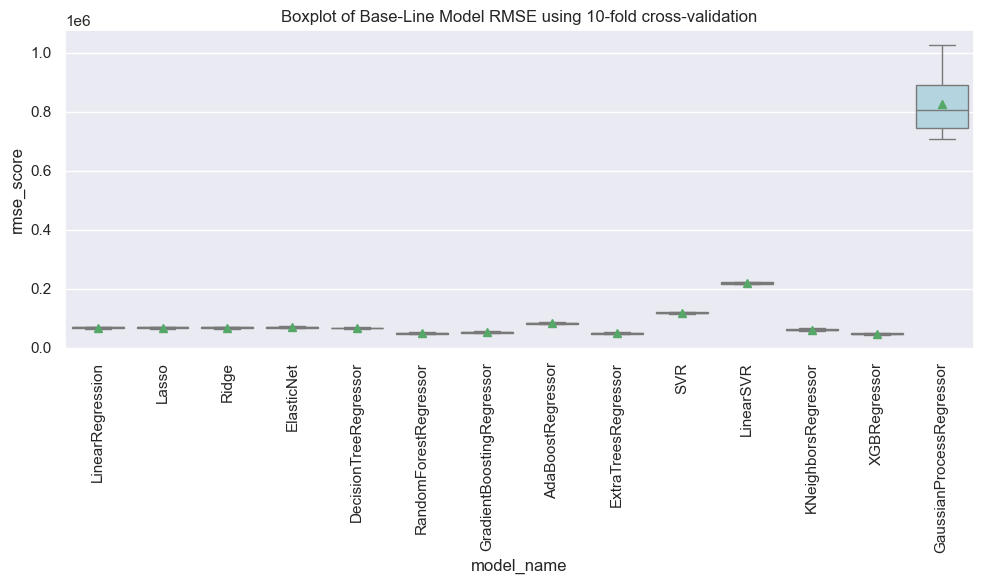

Mean  Standard Deviation
model_name                                                  
GaussianProcessRegressor   827364.115539       108698.983419
LinearSVR                  220187.044322         3540.385379
SVR                        118578.126206         2579.435262
AdaBoostRegressor           83568.374832         2554.350410
ElasticNet                  69629.790056         2307.959231
LinearRegression            68986.105082         2479.328871
Ridge                       68986.049012         2479.189980
Lasso                       68984.806175         2478.264019
DecisionTreeRegressor       68281.305208         2051.893014
KNeighborsRegressor         61904.213098         2489.214576
GradientBoostingRegressor   53068.160798         1854.807150
ExtraTreesRegressor         50422.309557         2220.962537
RandomForestRegressor       50304.290437         2136.073666
XGBRegressor                48649.508704         1890.158383

In [ ]:
def generate_baseline_results(models, X, y, metrics, cv = 10, plot_results = False):
    # define K -Fold
    kfold = KFold(cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        rmse_scores = np.sqrt(-scores)
        for fold_idx, rmse_score in enumerate(rmse_scores):
            entries.append((model_name, fold_idx, rmse_score))
    cv_df = pd.DataFrame(entries, columns=["model_name", "fold_id", "rmse_score"])

    if plot_results:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x = "model_name", y = "rmse_score", data = cv_df, color = "lightblue", showmeans = True)
        plt.title("Boxplot of Base-Line Model RMSE using 10-fold cross-validation")
        plt.xticks(rotation = 90)
        plt.tight_layout()
        plt.show()
    else:
        pass

    # Summary
    mean_rmse_score = cv_df.groupby("model_name")["rmse_score"].mean()
    std_rmse_score = cv_df.groupby("model_name")["rmse_score"].std()

    baseline_result = pd.concat([mean_rmse_score, std_rmse_score], axis=1, ignore_index=True)
    baseline_result.columns = ["Mean", "Standard Deviation"]

    # Sort by accuracy
    baseline_result.sort_values(by=["Mean"], ascending=False, inplace=True)
    return baseline_result

generate_baseline_results(models, df_housing_prepared, df_housing_labels,
                          metrics = "neg_mean_squared_error", cv = 10, plot_results = True)


- Tốt hơn nhiều: Có thể thấy ExtraTreesRegressor, RandomForestRegressor, XGBRegressor tốt hơn nhiều so với những model còn lại.


## 5.3. Fine-Tune Your Model

Giả sử rằng bây giờ bạn có danh sách rút gọn các mô hình hứa hẹn (ví dụ RandomForestRegressor). Bây giờ bạn cần tinh chỉnh chúng

### 5.3.1. Grid Search

- Một cách để thực hiện điều đó là chỉnh sửa các siêu tham số theo cách thủ công, cho đến khi bạn tìm thấy sự kết hợp tuyệt vời của các siêu tham số
- `GridSearchCV` của Scikit-Learn được dùng để tìm kiếm các siêu tham số nào bạn muốn thử nghiệm và các giá trị nào để thử nghiệm
- Nó sẽ đánh giá tất cả các kết hợp có thể có của các giá trị siêu tham số, bằng cách sử dụng xác thực chéo (using cross-validation).

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    #first evaluate all 4 × 4 = 16 combinations of n_estimators and max_features hyperparameter values specified in the first dict
    {'n_estimators': [3, 10, 30, 100], 'max_features': [2, 4, 6, 8]},
    #all 2 × 3 = 6 combinations of hyperparameter values in the second dict
    #this time with the bootstrap hyperparameter set to False instead of True (which is the default)
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=seed)

#All in all, the grid search will explore 16 + 6 = 22 combinations of RandomForestRegressor hyperparameter values
#Train each model five times (since we are using five-fold cross validation)
#All in all, there will be 22 × 10 = 220 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(df_housing_prepared, df_housing_labels)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_ #get the best combination of parameters

{'max_features': 8, 'n_estimators': 100}

Vì 8 và 100 là các giá trị tối đa đã được đánh giá, bạn có thể nên thử tìm kiếm lại với các giá trị cao hơn vì score có thể tiếp tục được cải thiện.

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, random_state=42)

Nếu `GridSearchCV` được khởi tạo với `refit=True` (là mặc định), thì khi tìm thấy ước lượng tốt nhất bằng cách sử dụng cross-validation, nó sẽ đào tạo lại ước lượng đó trên toàn bộ tập huấn luyện. Đây thường là một ý tưởng hay vì việc cung cấp thêm dữ liệu có thể cải thiện hiệu suất của nó.

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63344.2843298033 {'max_features': 2, 'n_estimators': 3}
54862.89920744262 {'max_features': 2, 'n_estimators': 10}
52697.50552263966 {'max_features': 2, 'n_estimators': 30}
51514.12126283301 {'max_features': 2, 'n_estimators': 100}
59816.5900472882 {'max_features': 4, 'n_estimators': 3}
52208.79042739915 {'max_features': 4, 'n_estimators': 10}
49940.79321142596 {'max_features': 4, 'n_estimators': 30}
49324.73391509833 {'max_features': 4, 'n_estimators': 100}
58399.0138725951 {'max_features': 6, 'n_estimators': 3}
51750.536226434866 {'max_features': 6, 'n_estimators': 10}
49843.73418673613 {'max_features': 6, 'n_estimators': 30}
49114.73413215176 {'max_features': 6, 'n_estimators': 100}
59042.89148591172 {'max_features': 8, 'n_estimators': 3}
52112.98171919949 {'max_features': 8, 'n_estimators': 10}
49613.19343171609 {'max_features': 8, 'n_estimators': 30}
49068.93350565969 {'max_features': 8, 'n_estimators': 100}
62312.42905083333 {'bootstrap': False, 'max_features': 2, 'n_estimators': 

- Trong ví dụ này, chúng ta có được giải pháp tốt nhất bằng cách đặt siêu tham số `max_features` thành 8 và siêu tham số `n_estimators` thành 100
- Điểm RMSE cho kết hợp này là 49068, tốt hơn một chút so với điểm bạn nhận được trước đó khi sử dụng các giá trị siêu tham số mặc định là 50304

### 5.3.2. Randomized Search
- Khi không gian tìm kiếm siêu tham số lớn, thường thì tốt hơn là sử dụng `RandomizedSearchCV`.
- Thay vì thử tất cả các kết hợp có thể như `GridSearchCV`, nó sẽ đánh giá một số lượng kết hợp ngẫu nhiên nhất định bằng cách chọn một giá trị ngẫu nhiên cho mỗi siêu tham số tại mỗi lần lặp.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

# param_grid = [
#     #first evaluate all 4 × 4 = 16 combinations of n_estimators and max_features hyperparameter values specified in the first dict
#     {'n_estimators': [3, 10, 30, 100], 'max_features': [2, 4, 6, 8]},
#     #all 2 × 3 = 6 combinations of hyperparameter values in the second dict
#     #this time with the bootstrap hyperparameter set to False instead of True (which is the default)
#     {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
#   ]

# Setup random hyperparameter search for RandomForestRegressor
randomized_search = RandomizedSearchCV(forest_reg,
                           param_distributions=param_distribs,
                           cv=10,
                           n_iter=10, # Số lần kết hợp ngẫu nhiên
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                                      verbose=True, random_state=42)

# Fit random hyperparameter search model for RandomForestRegressor()
randomized_search.fit(df_housing_prepared, df_housing_labels)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000221A25382F0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000221A0430260>},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=True)

In [ ]:
cvres = randomized_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params);

48797.135418850594 {'max_features': 7, 'n_estimators': 180}
51339.59942398198 {'max_features': 5, 'n_estimators': 15}
50269.22840989721 {'max_features': 3, 'n_estimators': 72}
50511.6400015255 {'max_features': 5, 'n_estimators': 21}
48933.33687189075 {'max_features': 7, 'n_estimators': 122}
50271.91143646523 {'max_features': 3, 'n_estimators': 75}
50142.1769943791 {'max_features': 3, 'n_estimators': 88}
49152.16550565188 {'max_features': 5, 'n_estimators': 100}
49991.777008167584 {'max_features': 3, 'n_estimators': 150}
64624.46167712258 {'max_features': 5, 'n_estimators': 2}


Rõ ràng với 'max_features': 5, 'n_estimators': 100 thì giá trị trả về nhìn chung tốt hơn nhưng để tốt hơn nữa thì có thể tăng n_iter lên điều đó đồng nghĩa thời gian thực thi sẽ lâu hơn.

### 5.4. Analyze the Best Models and Their Errors

- Bạn sẽ có được những hiểu biết sâu sắc về vấn đề bằng cách kiểm tra các mô hình tốt nhất.
- Ví dụ, `RandomForestRegressor` có thể chỉ ra tầm quan trọng tương đối của từng thuộc tính để đưa ra dự đoán chính xác

In [ ]:
feature_impotances = randomized_search.best_estimator_.feature_importances_
feature_impotances

array([7.13721236e-02, 6.28935545e-02, 4.30092772e-02, 1.64086555e-02,
       1.55670107e-02, 1.64745016e-02, 1.53753328e-02, 3.45190341e-01,
       5.95258394e-02, 1.10738856e-01, 6.97457058e-02, 8.67185471e-03,
       1.58662678e-01, 6.67961748e-05, 2.68890007e-03, 3.60857368e-03])

In [ ]:
extra_feature = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = preprocessor.named_transformers_["cat"]
cat_one_hot_feature = list(cat_encoder.categories_[0])
cat_one_hot_feature

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [ ]:
feature = num_feature + extra_feature + cat_one_hot_feature
for importance, name in zip(feature_impotances, feature):
    print(f"{name} - {importance}")

longitude - 0.07137212359389712
latitude - 0.06289355447798799
housing_median_age - 0.04300927718434755
total_rooms - 0.016408655481155898
total_bedrooms - 0.015567010725199514
population - 0.01647450156625561
households - 0.015375332753137499
median_income - 0.34519034100319007
rooms_per_hhold - 0.05952583935728965
pop_per_hhold - 0.1107388558918982
bedrooms_per_room - 0.06974570580531123
<1H OCEAN - 0.008671854710510336
INLAND - 0.15866267751808202
ISLAND - 6.679617480568286e-05
NEAR BAY - 0.0026889000738394447
NEAR OCEAN - 0.003608573683092269


- Với thông tin này, bạn có thể thử loại bỏ một số tính năng ít hữu ích hơn (ví dụ: rõ ràng chỉ có một danh mục `ocean_proximity ('INLAND')` thực sự hữu ích, vì vậy bạn có thể thử loại bỏ các danh mục khác `('<1H OCEAN','ISLAND','NEAR BAY', 'NEAR OCEAN')`).
- Thêm nữa dựa vào các hệ số trên hoàn toàn có thể xác định `median_income` là feature có sức ảnh hưởng cao nhất đến `median_house_value`.

### 5.5. Evaluate Your System on the Test Set

- Sau khi tinh chỉnh các mô hình của bạn trong một thời gian, cuối cùng bạn cũng có một hệ thống hoạt động đủ tốt.
- Bây giờ là lúc đánh giá mô hình cuối cùng trên bộ kiểm tra.
- lấy các biến dự đoán và nhãn từ bộ kiểm tra của bạn, chạy full_pipeline của bạn để chuyển đổi dữ liệu (gọi transform(), không phải fit_transform(), bạn không muốn fit lại bộ kiểm tra!), và đánh giá mô hình cuối cùng trên bộ kiểm tra:

In [ ]:
final_model = randomized_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = preprocessor.transform(X_test)
final_prediction = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_prediction)
final_mse = np.sqrt(final_mse)
final_mse

np.float64(46981.841079394515)

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_prediction - y_test) ** 2

m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(np.float64(45009.7312187091), np.float64(48874.439925573846))

In [ ]:
def plot_actual_predict(y_test, y_pred, number_sample = 250):
    # Sắp xếp dữ liệu để biểu diễn theo thứ tự
    indices = np.arange(number_sample)  # Tạo chỉ số cho 250 mẫu
    # Vẽ line chart
    plt.figure(figsize=(12, 6))
    plt.plot(indices, y_test[:number_sample], label="Actual Values (y_test)", color="blue", linewidth=2)
    plt.plot(indices, y_pred[:number_sample], label="Predicted Values (y_pred)", color="orange", linestyle="--", linewidth=2)
    plt.xlabel("Sample Index")
    plt.ylabel("House Price")
    plt.title("Actual vs Predicted Values (Line Chart)")
    plt.legend()
    plt.grid(True)
    plt.show()

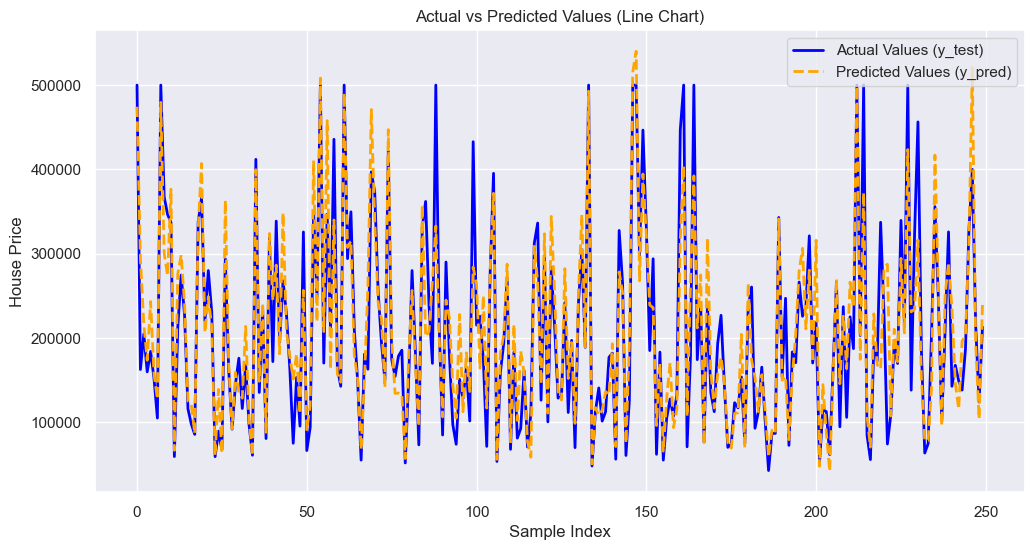

In [ ]:
plot_actual_predict(y_test, final_prediction)

Đoạn code bạn cung cấp được sử dụng để tính khoảng tin cậy 95% (95% confidence interval) cho giá trị RMSE (Root Mean Squared Error). Việc tính toán này giúp bạn ước lượng phạm vi mà giá trị RMSE thực tế có thể nằm trong, với độ tin cậy 95%. Đây là một phương pháp thống kê để đánh giá độ chính xác của mô hình hồi quy.

**Tại sao phải làm như vậy?**
**1. Đánh giá độ tin cậy của RMSE:**
- Giá trị RMSE được tính từ tập kiểm tra, nhưng nó chỉ là một ước lượng. Khoảng tin cậy giúp bạn hiểu được phạm vi mà giá trị RMSE thực tế có thể nằm trong, thay vì chỉ dựa vào một giá trị duy nhất.

**2. Xử lý sự biến động của dữ liệu:**
Dữ liệu kiểm tra có thể có sự biến động, dẫn đến sai số dự đoán không đồng nhất. Khoảng tin cậy giúp bạn đánh giá mức độ ổn định của RMSE.

**3. Đảm bảo tính thống kê:**
Sử dụng phân phối Student's t để tính khoảng tin cậy là một cách tiếp cận thống kê phổ biến, đặc biệt khi số lượng mẫu không quá lớn.

**Giải thích từng bước trong đoạn code** <br>
**1. Tính số lượng mẫu (m):** <br>
```python
m = len(squared_errors)
```
m là số lượng mẫu trong tập kiểm tra. Đây là bậc tự do cần thiết để tính giá trị t-score.

**2. Tính trung bình của sai số bình phương (mean):** <br>
```python
mean = squared_errors.mean()
````
`mean` là trung bình của các sai số bình phương, được sử dụng để tính RMSE.

**3. Tính giá trị t-score (tscore):** <br>
```python
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
```
- tscore là giá trị từ phân phối Student's t với mức độ tin cậy 95% và bậc tự do (df = m - 1).
- Giá trị này được sử dụng để tính sai số biên (margin of error).

**4. Tính sai số biên (tmargin):** <br>
```python
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
```
- tmargin là sai số biên, được tính dựa trên độ lệch chuẩn của sai số bình phương và số lượng mẫu.

**5. Tính khoảng tin cậy cho RMSE:** <br>
```python
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)
```
- Khoảng tin cậy được tính bằng cách lấy căn bậc hai của giá trị trung bình ± sai số biên.

**Ý nghĩa của kết quả:**
* **Lower Bound:** Giá trị RMSE thấp nhất mà mô hình có thể đạt được với độ tin cậy 95%.
* **Upper Bound:** Giá trị RMSE cao nhất mà mô hình có thể đạt được với độ tin cậy 95%.

Ví dụ: Nếu kết quả là (23000, 25000), điều này có nghĩa là với độ tin cậy 95%, giá trị RMSE thực tế nằm trong khoảng từ 23000 đến 25000.

**Tóm lại**
- Việc tính khoảng tin cậy 95% cho RMSE giúp bạn đánh giá độ chính xác và độ ổn định của mô hình hồi quy.
- Phương pháp này sử dụng phân phối Student's t để xử lý sự biến động của dữ liệu và cung cấp một phạm vi tin cậy thay vì chỉ một giá trị RMSE duy nhất.

Quay lại bài toán trên thì với `final_mse` là `46981.841079394515`nó nằm trong khoảng giá trị RMSE thực tế (45009, 48874) với độ tin cậy 95%.

### 5.6. House price prediction (with TensorBoard)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_valid, y_train, y_valid = train_test_split(df_housing_prepared, df_housing_labels, test_size=0.2, random_state=42)
# Xây dựng mô hình TensorFlow
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Định nghĩa đầu vào
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    # BatchNormalization(),  # Chuẩn hóa đầu vào của tầng tiếp theo
    # Dropout(0.2),          # Giảm overfitting bằng cách bỏ qua 20% nơ-ron
    Dense(64, activation='relu'),
    # BatchNormalization(),  # Chuẩn hóa đầu vào của tầng tiếp theo
    # Dropout(0.2),          # Giảm overfitting bằng cách bỏ qua 20% nơ-ron
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1) # Tầng đầu ra
])

root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

modelcheckpoint = ModelCheckpoint(
    filepath='my_model.keras',  # Đường dẫn để lưu mô hình
    save_best_only=True,       # Chỉ lưu mô hình tốt nhất
    monitor='val_loss',        # Theo dõi giá trị mất mát trên tập validation
    mode='min',                # Lưu mô hình khi giá trị mất mát giảm
    verbose=1
)

tensorboard = TensorBoard(
    run_logdir,
    histogram_freq=1,          # Tần suất ghi histogram (1 lần mỗi epoch)
    write_graph=True,          # Ghi đồ thị của mô hình
    write_images=True          # Ghi hình ảnh của các layer
)

# Biên dịch mô hình
model.compile(optimizer=Adam(learning_rate=3e-3), loss='mean_squared_error')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_valid, y_valid), verbose=1,
                    callbacks=[modelcheckpoint, tensorboard, EarlyStopping(patience=10)])

Epoch 1/50
378/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28117014528.0000
Epoch 1: val_loss improved from inf to 4483928576.00000, saving model to my_model.keras
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 26792609792.0000 - val_loss: 4483928576.0000
Epoch 2/50
411/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4520479744.0000
Epoch 2: val_loss improved from 4483928576.00000 to 4179440384.00000, saving model to my_model.keras
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4520336384.0000 - val_loss: 4179440384.0000
Epoch 3/50
411/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4485324800.0000
Epoch 3: val_loss improved from 4179440384.00000 to 4102632192.00000, saving model to my_model.keras
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4484193792.0000 - val_loss: 4102632192.0000
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4369080320.0000
Epoch 4: val_loss improved from 4102632192.00000 to 4054028544.00000, saving model to my_model.keras
413/413 ━━━━━━━━━━━━━━━━

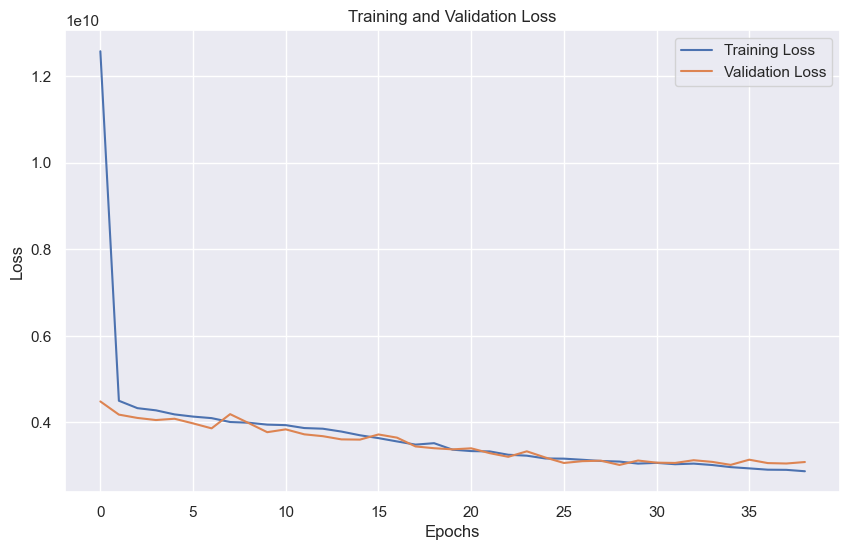

In [ ]:
history_df = pd.DataFrame(history.history)

# Vẽ đồ thị loss và val_loss
plt.figure(figsize=(10, 6))
plt.plot(history_df["loss"], label="Training Loss")
plt.plot(history_df["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_prepared)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step


In [ ]:
final_mse_tensor = mean_squared_error(y_test, y_pred)
final_rmse_tensor = np.sqrt(final_mse_tensor)
final_rmse_tensor

np.float64(54158.089003818764)

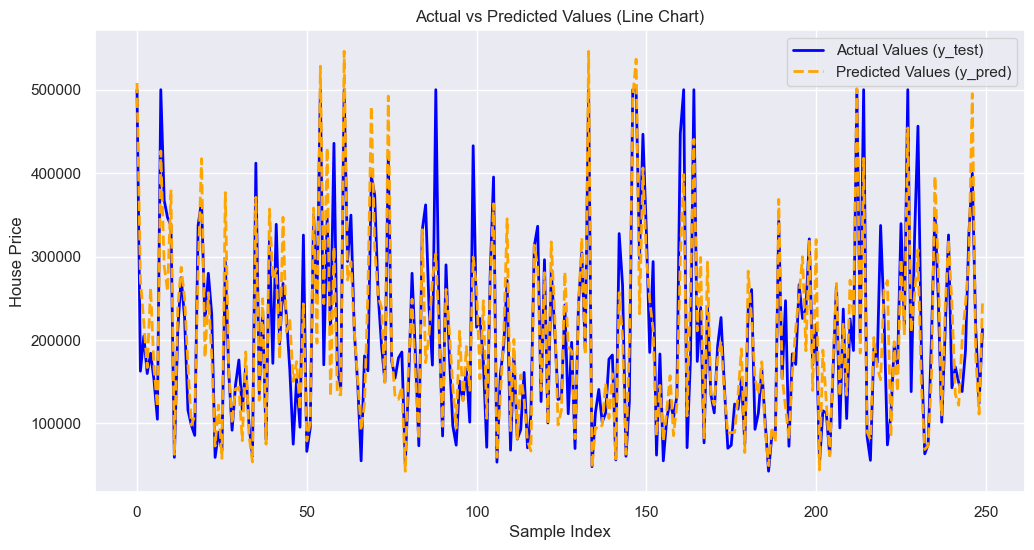

In [ ]:
plot_actual_predict(y_test, y_pred)

In [ ]:
confidence = 0.95
squared_errors = (y_pred.reshape(-1) - y_test) ** 2

m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(np.float64(52133.5912596848), np.float64(56109.588052838415))

### 5.7. House price prediction (with KerasRegressor)

In [ ]:
def build_model(n_hidden = 5, n_neurons = 256, learning_rate = 3e-3, input_shape = (X_train.shape[1],)):
  model = Sequential()
  model.add(Input(shape = input_shape))
  for _ in range(0, n_hidden):
    n_neurons = int(n_neurons / 2)
    model.add(Dense(n_neurons, activation = "relu"))
  model.add(Dense(1))
  optimizer = Adam(learning_rate = learning_rate)
  model.compile(loss = "mse", optimizer=optimizer)
  return model

In [ ]:
from scikeras.wrappers import KerasRegressor

keras_reg = KerasRegressor(build_model)
history_keras_reg = keras_reg.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_valid, y_valid), verbose=1,
                    callbacks=[modelcheckpoint, tensorboard, EarlyStopping(patience=10)])

Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 30059536384.0000 - val_loss: 4441859584.0000
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4553635840.0000 - val_loss: 4207641088.0000
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4343106560.0000 - val_loss: 4186343424.0000
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4271128576.0000 - val_loss: 4284716800.0000
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4237804032.0000 - val_loss: 4073541376.0000
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4119939328.0000 - val_loss: 4033970176.0000
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4166355712.0000 - val_loss: 3912806656.0000
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4151214848.0000 - val_loss: 3893398784.0000
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3935145984.0000 - val_loss: 3831934720.0000
Epoch 10/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 39

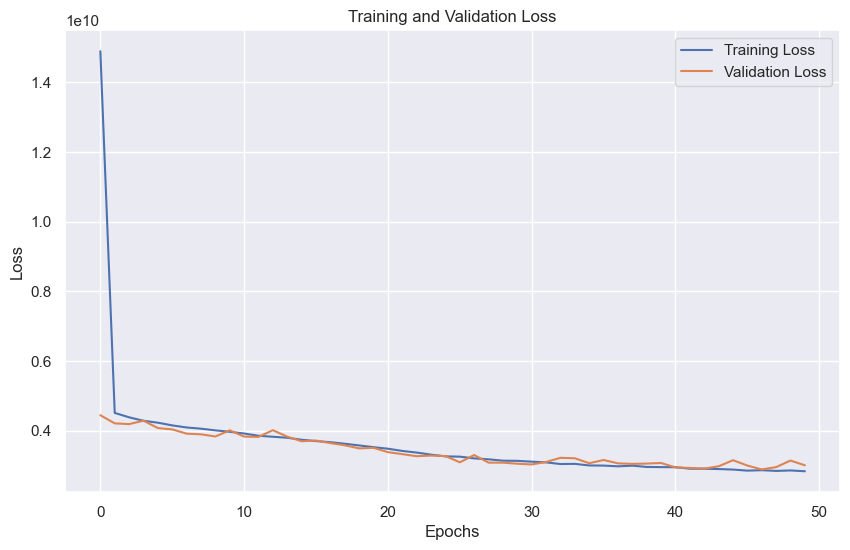

In [ ]:
history_keras_reg_df = pd.DataFrame(history_keras_reg.history_)
# Vẽ đồ thị loss và val_loss
plt.figure(figsize=(10, 6))
plt.plot(history_keras_reg_df["loss"], label="Training Loss")
plt.plot(history_keras_reg_df["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
y_pred_keras_reg = keras_reg.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, y_pred_keras_reg)
final_rmse = np.sqrt(final_mse)
final_rmse

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step


np.float64(53567.49056365515)

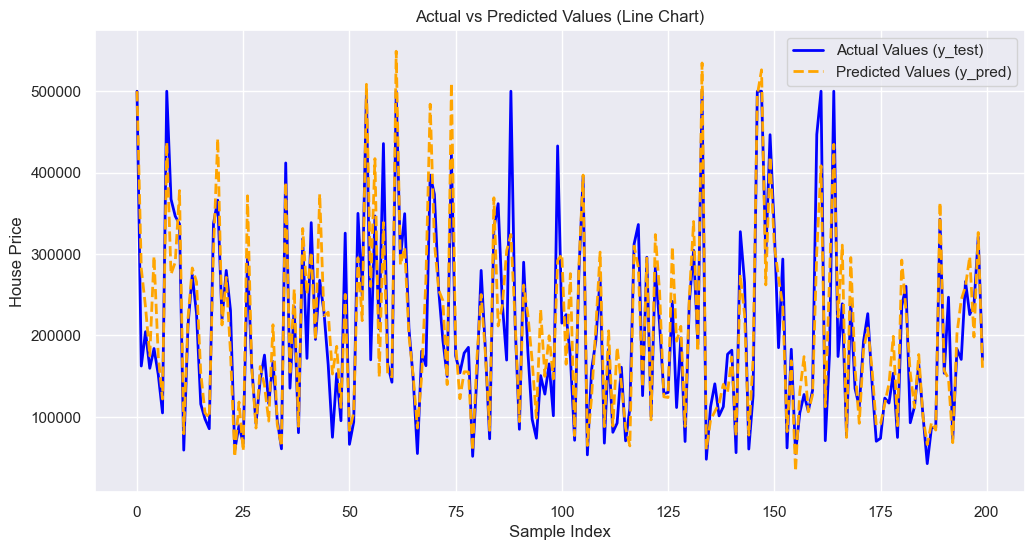

In [ ]:
plot_actual_predict(y_test, y_pred_keras_reg, number_sample=200)

### 5.8. Fine-Tuning Neural Network Hyperparameters

In [ ]:
from scipy.stats import reciprocal

kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
param_distribs = {
    "model__n_hidden": [1, 2, 3, 4, 5],
    "model__n_neurons": np.arange(200, 300, dtype=int),
    "model__learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_seach_cv = RandomizedSearchCV(estimator= keras_reg, param_distributions=param_distribs, n_iter=10, cv=kfold)
rnd_seach_cv.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid), verbose=1,
                    callbacks=[modelcheckpoint, tensorboard, EarlyStopping(patience=10)])

Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 56040607744.0000 - val_loss: 50005905408.0000
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 45497700352.0000 - val_loss: 24366307328.0000
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19797911552.0000 - val_loss: 10838309888.0000
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10225832960.0000 - val_loss: 8188865536.0000
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7589031424.0000 - val_loss: 6573975552.0000
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6472156160.0000 - val_loss: 5586320384.0000
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5333238784.0000 - val_loss: 5008820224.0000
Epoch 8/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5117765632.0000 - val_loss: 4688457216.0000
Epoch 9/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4959789056.0000 - val_loss: 4518351872.0000
Epoch 10/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=KerasRegressor(model=<function build_model at 0x000002221E0871A0>),
                   param_distributions={'model__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000022212D476B0>,
                                        'model__n_hidden': [1, 2, 3, 4, 5],
                                        'model__n_neurons': array([200, 201, 202, 203, 204, 205...
       213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225,
       226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238,
       239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251,
       252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264,
       265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277,
       278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290,
       291, 292, 293, 294, 295, 296, 297, 298, 299])})

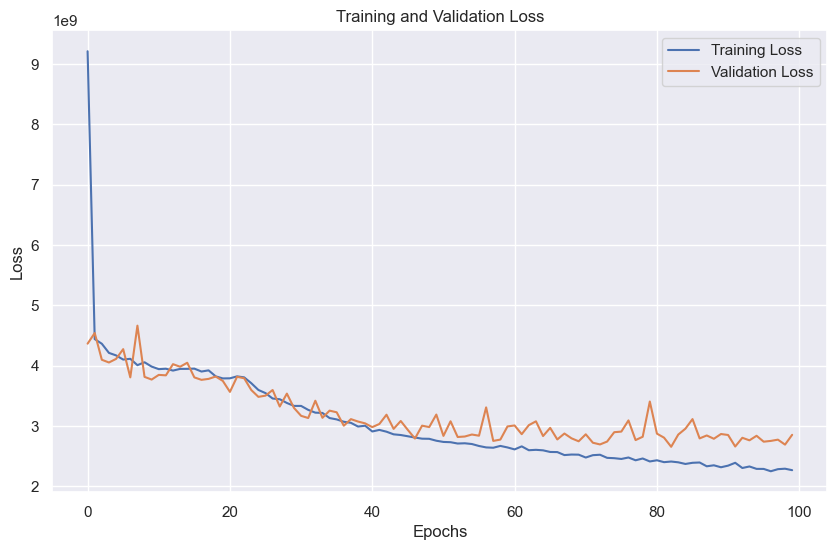

In [ ]:
history_keras_reg_rnd = pd.DataFrame(rnd_seach_cv.best_estimator_.history_)
# Vẽ đồ thị loss và val_loss
plt.figure(figsize=(10, 6))
plt.plot(history_keras_reg_rnd["loss"], label="Training Loss")
plt.plot(history_keras_reg_rnd["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
rnd_seach_cv.best_params_

{'model__learning_rate': np.float64(0.02296604781469743),
 'model__n_hidden': 3,
 'model__n_neurons': np.int64(264)}

In [ ]:
final_model = rnd_seach_cv.best_estimator_

In [ ]:
y_pred_keras_reg_search = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, y_pred_keras_reg_search)
final_rmse = np.sqrt(final_mse)
final_rmse

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step


np.float64(51873.90984927518)

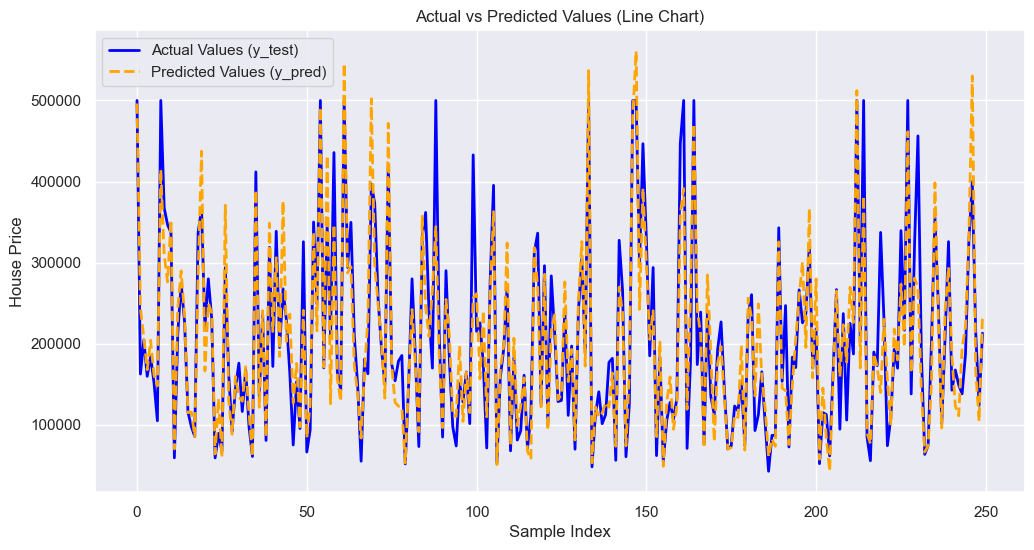

In [ ]:
plot_actual_predict(y_test, y_pred_keras_reg_search)

In [ ]:
confidence = 0.95
squared_errors = (y_pred_keras_reg_search - y_test) ** 2
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(np.float64(49713.60416152009), np.float64(53947.77666756203))

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step
78/78 ━━━━━━━━━━━━

PermutationExplainer explainer:   5%|▌         | 5/100 [00:00<?, ?it/s]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step


PermutationExplainer explainer:   7%|▋         | 7/100 [00:13<01:41,  1.09s/it]

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step


PermutationExplainer explainer:   8%|▊         | 8/100 [00:15<02:25,  1.58s/it]

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step


PermutationExplainer explainer:   9%|▉         | 9/100 [00:17<02:47,  1.84s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


PermutationExplainer explainer:  10%|█         | 10/100 [00:19<02:58,  1.99s/it]

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step


PermutationExplainer explainer:  11%|█         | 11/100 [00:22<03:03,  2.07s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step


PermutationExplainer explainer:  12%|█▏        | 12/100 [00:24<03:04,  2.09s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


PermutationExplainer explainer:  13%|█▎        | 13/100 [00:26<03:05,  2.14s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step


PermutationExplainer explainer:  14%|█▍        | 14/100 [00:28<03:05,  2.15s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step


PermutationExplainer explainer:  15%|█▌        | 15/100 [00:30<03:05,  2.18s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step


PermutationExplainer explainer:  16%|█▌        | 16/100 [00:33<03:03,  2.19s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step


PermutationExplainer explainer:  17%|█▋        | 17/100 [00:35<03:02,  2.20s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step


PermutationExplainer explainer:  18%|█▊        | 18/100 [00:37<03:01,  2.21s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step


PermutationExplainer explainer:  19%|█▉        | 19/100 [00:39<03:02,  2.26s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step


PermutationExplainer explainer:  20%|██        | 20/100 [00:41<02:56,  2.21s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step


PermutationExplainer explainer:  21%|██        | 21/100 [00:44<02:53,  2.20s/it]

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step


PermutationExplainer explainer:  22%|██▏       | 22/100 [00:46<02:51,  2.20s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step


PermutationExplainer explainer:  23%|██▎       | 23/100 [00:48<02:50,  2.21s/it]

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step


PermutationExplainer explainer:  24%|██▍       | 24/100 [00:50<02:49,  2.24s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step


PermutationExplainer explainer:  25%|██▌       | 25/100 [00:53<02:48,  2.24s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step


PermutationExplainer explainer:  26%|██▌       | 26/100 [00:55<02:47,  2.26s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step


PermutationExplainer explainer:  27%|██▋       | 27/100 [00:57<02:45,  2.26s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step


PermutationExplainer explainer:  28%|██▊       | 28/100 [00:59<02:40,  2.23s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step


PermutationExplainer explainer:  29%|██▉       | 29/100 [01:02<02:38,  2.23s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step


PermutationExplainer explainer:  30%|███       | 30/100 [01:04<02:37,  2.25s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step


PermutationExplainer explainer:  31%|███       | 31/100 [01:06<02:36,  2.27s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step


PermutationExplainer explainer:  32%|███▏      | 32/100 [01:08<02:33,  2.26s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step


PermutationExplainer explainer:  33%|███▎      | 33/100 [01:11<02:31,  2.26s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step


PermutationExplainer explainer:  34%|███▍      | 34/100 [01:13<02:27,  2.24s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step


PermutationExplainer explainer:  35%|███▌      | 35/100 [01:15<02:26,  2.25s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


PermutationExplainer explainer:  36%|███▌      | 36/100 [01:17<02:23,  2.24s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step


PermutationExplainer explainer:  37%|███▋      | 37/100 [01:20<02:18,  2.19s/it]

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


PermutationExplainer explainer:  38%|███▊      | 38/100 [01:22<02:17,  2.22s/it]

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 39/100 [01:24<02:14,  2.21s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step


PermutationExplainer explainer:  40%|████      | 40/100 [01:26<02:13,  2.22s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step


PermutationExplainer explainer:  41%|████      | 41/100 [01:28<02:10,  2.21s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step


PermutationExplainer explainer:  42%|████▏     | 42/100 [01:31<02:08,  2.22s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step


PermutationExplainer explainer:  43%|████▎     | 43/100 [01:33<02:05,  2.20s/it]

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


PermutationExplainer explainer:  44%|████▍     | 44/100 [01:35<02:04,  2.21s/it]

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step


PermutationExplainer explainer:  45%|████▌     | 45/100 [01:37<02:02,  2.23s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step


PermutationExplainer explainer:  46%|████▌     | 46/100 [01:39<01:59,  2.21s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step


PermutationExplainer explainer:  47%|████▋     | 47/100 [01:42<01:56,  2.21s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 48/100 [01:44<01:54,  2.20s/it]

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step


PermutationExplainer explainer:  49%|████▉     | 49/100 [01:46<01:53,  2.23s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 50/100 [01:48<01:51,  2.24s/it]

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step


PermutationExplainer explainer:  51%|█████     | 51/100 [01:51<01:48,  2.22s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step


PermutationExplainer explainer:  52%|█████▏    | 52/100 [01:53<01:46,  2.22s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


PermutationExplainer explainer:  53%|█████▎    | 53/100 [01:55<01:47,  2.28s/it]

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 54/100 [01:58<01:46,  2.31s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 55/100 [02:00<01:42,  2.28s/it]

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 56/100 [02:02<01:41,  2.30s/it]

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step


PermutationExplainer explainer:  57%|█████▋    | 57/100 [02:04<01:38,  2.29s/it]

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step


PermutationExplainer explainer:  58%|█████▊    | 58/100 [02:07<01:36,  2.30s/it]

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step


PermutationExplainer explainer:  59%|█████▉    | 59/100 [02:09<01:34,  2.30s/it]

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step


PermutationExplainer explainer:  60%|██████    | 60/100 [02:11<01:32,  2.30s/it]

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step


PermutationExplainer explainer:  61%|██████    | 61/100 [02:14<01:30,  2.32s/it]

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step


PermutationExplainer explainer:  62%|██████▏   | 62/100 [02:16<01:27,  2.31s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


PermutationExplainer explainer:  63%|██████▎   | 63/100 [02:18<01:24,  2.28s/it]

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step


PermutationExplainer explainer:  64%|██████▍   | 64/100 [02:21<01:21,  2.28s/it]

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step


PermutationExplainer explainer:  65%|██████▌   | 65/100 [02:23<01:19,  2.26s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step


PermutationExplainer explainer:  66%|██████▌   | 66/100 [02:25<01:16,  2.24s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step


PermutationExplainer explainer:  67%|██████▋   | 67/100 [02:27<01:12,  2.19s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 68/100 [02:29<01:10,  2.20s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


PermutationExplainer explainer:  69%|██████▉   | 69/100 [02:31<01:08,  2.20s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step


PermutationExplainer explainer:  70%|███████   | 70/100 [02:34<01:05,  2.19s/it]

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step


PermutationExplainer explainer:  71%|███████   | 71/100 [02:36<01:04,  2.22s/it]

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step


PermutationExplainer explainer:  72%|███████▏  | 72/100 [02:38<01:02,  2.22s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 73/100 [02:40<00:59,  2.21s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 74/100 [02:42<00:57,  2.20s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


PermutationExplainer explainer:  75%|███████▌  | 75/100 [02:45<00:54,  2.20s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step


PermutationExplainer explainer:  76%|███████▌  | 76/100 [02:47<00:51,  2.16s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step


PermutationExplainer explainer:  77%|███████▋  | 77/100 [02:49<00:50,  2.18s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 78/100 [02:51<00:48,  2.19s/it]

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 79/100 [02:53<00:45,  2.19s/it]

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step


PermutationExplainer explainer:  80%|████████  | 80/100 [02:56<00:44,  2.20s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step


PermutationExplainer explainer:  81%|████████  | 81/100 [02:59<00:46,  2.47s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step


PermutationExplainer explainer:  82%|████████▏ | 82/100 [03:01<00:42,  2.38s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step


PermutationExplainer explainer:  83%|████████▎ | 83/100 [03:03<00:39,  2.33s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step


PermutationExplainer explainer:  84%|████████▍ | 84/100 [03:05<00:36,  2.28s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step


PermutationExplainer explainer:  85%|████████▌ | 85/100 [03:07<00:33,  2.25s/it]

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 86/100 [03:10<00:31,  2.22s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 87/100 [03:12<00:28,  2.21s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step


PermutationExplainer explainer:  88%|████████▊ | 88/100 [03:14<00:26,  2.20s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 89/100 [03:16<00:24,  2.19s/it]

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step


PermutationExplainer explainer:  90%|█████████ | 90/100 [03:18<00:21,  2.19s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 91/100 [03:20<00:19,  2.20s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step


PermutationExplainer explainer:  92%|█████████▏| 92/100 [03:23<00:17,  2.21s/it]

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step


PermutationExplainer explainer:  93%|█████████▎| 93/100 [03:25<00:15,  2.22s/it]

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step


PermutationExplainer explainer:  94%|█████████▍| 94/100 [03:27<00:13,  2.22s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 95/100 [03:29<00:11,  2.21s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step


PermutationExplainer explainer:  96%|█████████▌| 96/100 [03:32<00:08,  2.21s/it]

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


PermutationExplainer explainer:  97%|█████████▋| 97/100 [03:34<00:06,  2.22s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 98/100 [03:36<00:04,  2.21s/it]

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 99/100 [03:38<00:02,  2.22s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer: 100%|██████████| 100/100 [03:40<00:00,  2.20s/it]

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer: 101it [03:43,  2.32s/it]                         


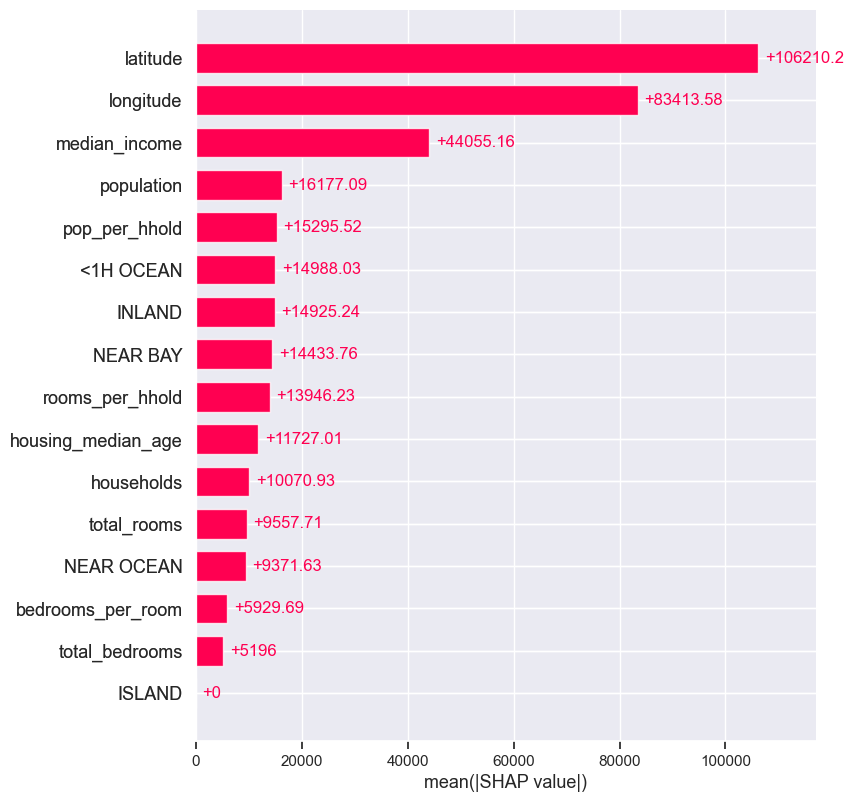

In [ ]:
import shap

# Lấy 100 mẫu đầu tiên từ X_test_prepared
X_test_sample = pd.DataFrame(X_test_prepared[:100], columns=feature)

# Tạo đối tượng Explainer
explainer = shap.Explainer(final_model.predict, X_test_sample)

# Tính giá trị SHAP
shap_values = explainer(X_test_sample)

# Vẽ đồ thị tầm quan trọng của các đặc trưng
shap.plots.bar(shap_values, max_display=16)

PermutationExplainer explainer: 101it [01:45,  1.16s/it]                         


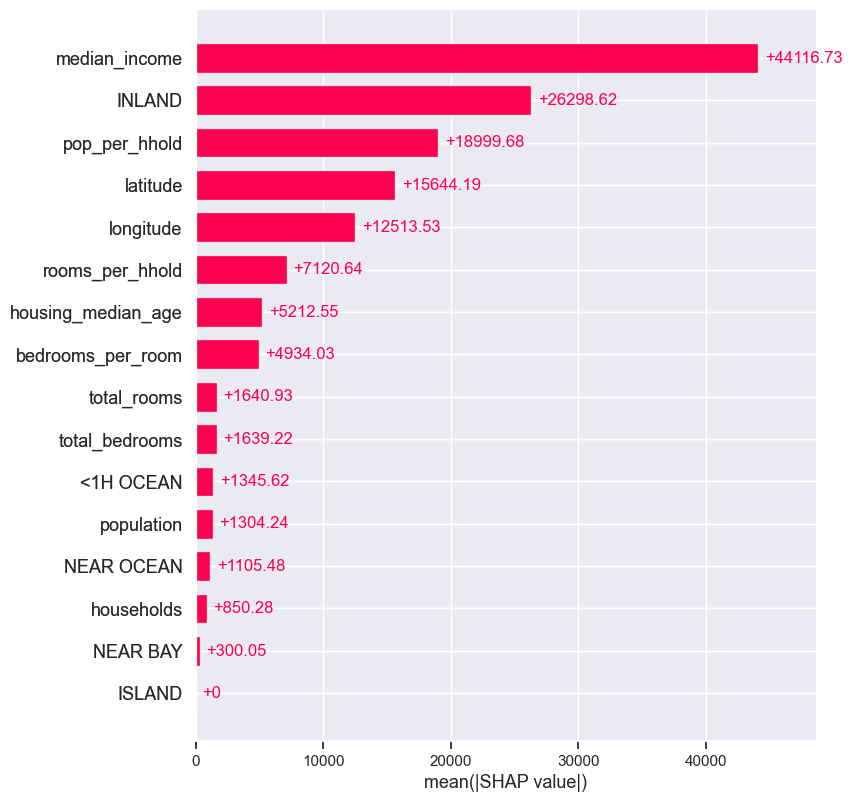

In [ ]:
explainer_rf = shap.Explainer(randomized_search.best_estimator_.predict, X_test_sample.to_numpy())
shap_values_rf = explainer_rf(X_test_sample)
shap.plots.bar(shap_values_rf, max_display=16)

- Kết quả tốt hơn sau khi hiệu chỉnh tham số. Có thể tối ưu hơn bằng cách sử dụng GridSearchCV vì GridSearchCV sẽ chạy hết toàn bộ combine và có thể có model tối ưu hơn nữa. Hoặc có thể tăng epoc lên 200, tăng số lượng neuron,... Nhưng sẽ rất tốn thời gian chạy.
- Với `RandomForestRegressor` thì `median_income` là đặc trưng mạnh trong dữ liệu Housing vì nó có mối quan hệ trực tiếp với giá trị nhà nhưng đối với `KerasRegressor` thì là `latitude` điều này chưa chắc đã sai vì `Keras` sử dụng các tầng phi tuyến (non-linear layers) để học mối quan hệ phức tạp giữa các đặc trưng và mục tiêu do đó mô hình có thể học được các tương tác giữa các đặc trưng mà RandomForest không thể.
- Có thể chạy thêm `ExtraTreesRegressor`, `XGBRegressor` và kết hợp với chỉnh sửa siêu tham số để hiểu hơn.